## IMPORTATIONS DES LIBRAIRIES ET DE LA DATASET


In [176]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2
from datetime import datetime, date
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [177]:
# Importation de la dataset
url='https://drive.google.com/file/d/1zV6kSQY15av3bC7E-RPreAiV_kkCliGs/view?usp=share_link'
file_id=url.split('/')[-2]
insurance='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(insurance)
df

,CODE_CONTRAT,NAT_INDIV,PAYS,SIT_PROF,DATE_EFFET,DATE_ECHEANCE,DUREE_CONTRAT,FREQ,MT_PRIME_P,TYPE_PRODUIT,DATE_BIRTH,DATE_RT_1,MP_TERM,PRIME_TOTAL,NBRE_PRIME,TOTAL_RP,NBRE_RP,ETAT_CONTRAT,ETAT_PTERM
0,ID000001,Mr,BENIN,COMMERCE-BUSINESS,30/04/1997,31/03/2012,15,IRREGULIER,2000000,PROD_1,01/01/1970,01/01/1900,0,24400000,22,0,0,0,0
1,ID000002,Mme,BENIN,PROF LIBERALE,30/05/1997,30/04/2007,10,IRREGULIER,500000,PROD_1,NaN,01/01/1900,0,1500000,3,-1000000,1,0,0
2,ID000003,Mr,BENIN,COMMERCE-BUSINESS,30/04/1997,31/03/2007,10,IRREGULIER,2000000,PROD_1,01/01/1970,03/12/1998,0,2000000,1,0,0,1,0
3,ID000004,Mr,BENIN,COMMERCE-BUSINESS,30/06/1997,31/05/2007,10,IRREGULIER,2000000,PROD_1,01/01/1970,23/09/2002,0,2000000,1,0,0,1,0
4,ID000005,Mme,BENIN,COMMERCE-BUSINESS,31/07/1997,30/06/2008,11,IRREGULIER,1000000,PROD_1,01/01/1970,01/01/1900,0,1000000,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4121,ID004122,Mme,BENIN,ETUDIANT,31/08/2022,31/07/2032,10,MENSUEL,15000,PROD_5,03/05/1969,01/01/1900,0,15000,1,0,0,0,0
4122,ID004123,Mme,BENIN,ETUDIANT,31/08/2022,31/07/2032,10,MENSUEL,15000,PROD_5,03/05/1969,01/01/1900,0,15000,1,0,0,0,0
4123,ID004124,Mr,BENIN,ETUDIANT,30/09/2022,31/08/2032,10,MENSUEL,15000,PROD_5,19/08/1955,01/01/1900,0,30000,2,0,0,0,0
4124,ID004125,Mr,BENIN,ETUDIANT,31/10/2022,30/09/2032,10,MENSUEL,15000,PROD_5,06/07/1959,01/01/1900,0,15000,1,0,0,0,0


## ANALYSE DESCRIPTIVE

* CODE_CONTRAT	Num d’identification du contrat
* NAT_INDIV	Mr, mme…
* SIT_PROF	Profession de l’assuré
* DATE_EFFET	Date de début du contrat
* DATE_ECHEANCE	Date de fin du contrat
* DUREE_CONTRAT	Durée du contrat
* FREQ	Fréquence de paiement de la prime
* MT_PRIME_P	Montant de la prime périodique
* TYPE_PRODUIT	Type du produit 
* DATE_BIRTH	Date de naissance de l’assuré
* MP_TERM	Montant de prestation à la fin du contrat
* PRIME_TOTAL	Somme de la prime total
* NBRE_PRIME	Nombre de la prime total
* TOTAL_RP	Total des Rachats partiel
* NBRE_RP	Nombre total de rachat partiel
* ETAT_CONTRAT	Indicateur de Rachat total (0 pour contrat en cours et 1 pour contrat résilié)
* ETAT_PTERM	Indicateur de fin de prestation (0 pour contrat en cours et 1 pour le contraire)
* MT_RACHAT_TOTAL	Montant du rachat total




In [178]:
df.shape

(4126, 19)

In [179]:
#Vérification du type des variables

data = df.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4126 entries, 0 to 4125
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CODE_CONTRAT   4126 non-null   object
 1   NAT_INDIV      4120 non-null   object
 2   PAYS           4126 non-null   object
 3   SIT_PROF       4112 non-null   object
 4   DATE_EFFET     4126 non-null   object
 5   DATE_ECHEANCE  4126 non-null   object
 6   DUREE_CONTRAT  4126 non-null   int64 
 7   FREQ           4126 non-null   object
 8   MT_PRIME_P     4126 non-null   int64 
 9   TYPE_PRODUIT   4126 non-null   object
 10  DATE_BIRTH     3928 non-null   object
 11  DATE_RT_1      4126 non-null   object
 12  MP_TERM        4126 non-null   int64 
 13  PRIME_TOTAL    4126 non-null   int64 
 14  NBRE_PRIME     4126 non-null   int64 
 15  TOTAL_RP       4126 non-null   int64 
 16  NBRE_RP        4126 non-null   int64 
 17  ETAT_CONTRAT   4126 non-null   int64 
 18  ETAT_PTERM     4126 non-null

Nous avons 09 variables de type integer (int64) et 10 variables de type catégorielle (object)

In [180]:
data = data.apply(lambda col: pd.to_datetime(col) if col.name.startswith('DATE') else col)

<ipython-input-180-2f589b03b4f4>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data = data.apply(lambda col: pd.to_datetime(col) if col.name.startswith('DATE') else col)
<ipython-input-180-2f589b03b4f4>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data = data.apply(lambda col: pd.to_datetime(col) if col.name.startswith('DATE') else col)
<ipython-input-180-2f589b03b4f4>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data = data.apply(lambda col: pd.to_datetime(col) if col.name.startswith('DATE') else col)
<ipython-input-180-2f589b03b4f4>:1: UserWar

In [181]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4126 entries, 0 to 4125
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CODE_CONTRAT   4126 non-null   object        
 1   NAT_INDIV      4120 non-null   object        
 2   PAYS           4126 non-null   object        
 3   SIT_PROF       4112 non-null   object        
 4   DATE_EFFET     4126 non-null   datetime64[ns]
 5   DATE_ECHEANCE  4126 non-null   datetime64[ns]
 6   DUREE_CONTRAT  4126 non-null   int64         
 7   FREQ           4126 non-null   object        
 8   MT_PRIME_P     4126 non-null   int64         
 9   TYPE_PRODUIT   4126 non-null   object        
 10  DATE_BIRTH     3928 non-null   datetime64[ns]
 11  DATE_RT_1      4126 non-null   datetime64[ns]
 12  MP_TERM        4126 non-null   int64         
 13  PRIME_TOTAL    4126 non-null   int64         
 14  NBRE_PRIME     4126 non-null   int64         
 15  TOTAL_RP       4126 n

In [182]:
data.describe()

,DUREE_CONTRAT,MT_PRIME_P,MP_TERM,PRIME_TOTAL,NBRE_PRIME,TOTAL_RP,NBRE_RP,ETAT_CONTRAT,ETAT_PTERM
count,4126.000000,4.126000e+03,4126.0,4.126000e+03,4126.000000,4.126000e+03,4126.000000,4126.000000,4126.0
mean,10.574891,3.525775e+05,0.0,1.538118e+06,26.990790,-2.075894e+05,0.191953,0.308531,0.0
std,2.626409,2.023551e+06,0.0,3.992198e+06,32.317589,1.738096e+06,0.572495,0.461943,0.0
min,1.000000,1.500000e+04,0.0,0.000000e+00,0.000000,-7.000000e+07,0.000000,0.000000,0.0
25%,10.000000,2.000000e+04,0.0,2.400000e+05,2.000000,0.000000e+00,0.000000,0.000000,0.0
50%,10.000000,2.000000e+04,0.0,6.000000e+05,13.000000,0.000000e+00,0.000000,0.000000,0.0
75%,10.000000,1.165095e+05,0.0,1.400000e+06,41.000000,0.000000e+00,0.000000,1.000000,0.0
max,34.000000,8.000000e+07,0.0,8.000000e+07,224.000000,0.000000e+00,6.000000,1.000000,0.0


On remarque que :
- La lecture de la description statistique des données nous informe que les variables n'ont pas une distribution normale car l'écart entre leurs moyennes et la médiane est fortement élevé pour la plupart.
- La variable cible (ETAT_CONTRAT) présente une moyenne et une médiane qui sont toutes deux égales à zéro. Ce que suggère que la majorité des contrats (environ 75%) n'ont pas été résiliés. 
- La colonne DUREE_CONTRAT a une durée moyenne de 10,57 ans et une durée maximale de 34 ans. 

In [183]:
data.describe(include=['object'])

,CODE_CONTRAT,NAT_INDIV,PAYS,SIT_PROF,FREQ,TYPE_PRODUIT
count,4126,4120,4126,4112,4126,4126
unique,4126,11,5,15,5,7
top,ID000001,Mr,BENIN,Divers,MENSUEL,PROD_1
freq,1,2738,4120,1591,3013,3237


In [184]:
data.isna().sum(axis=0)

CODE_CONTRAT       0
NAT_INDIV          6
PAYS               0
SIT_PROF          14
DATE_EFFET         0
DATE_ECHEANCE      0
DUREE_CONTRAT      0
FREQ               0
MT_PRIME_P         0
TYPE_PRODUIT       0
DATE_BIRTH       198
DATE_RT_1          0
MP_TERM            0
PRIME_TOTAL        0
NBRE_PRIME         0
TOTAL_RP           0
NBRE_RP            0
ETAT_CONTRAT       0
ETAT_PTERM         0
dtype: int64

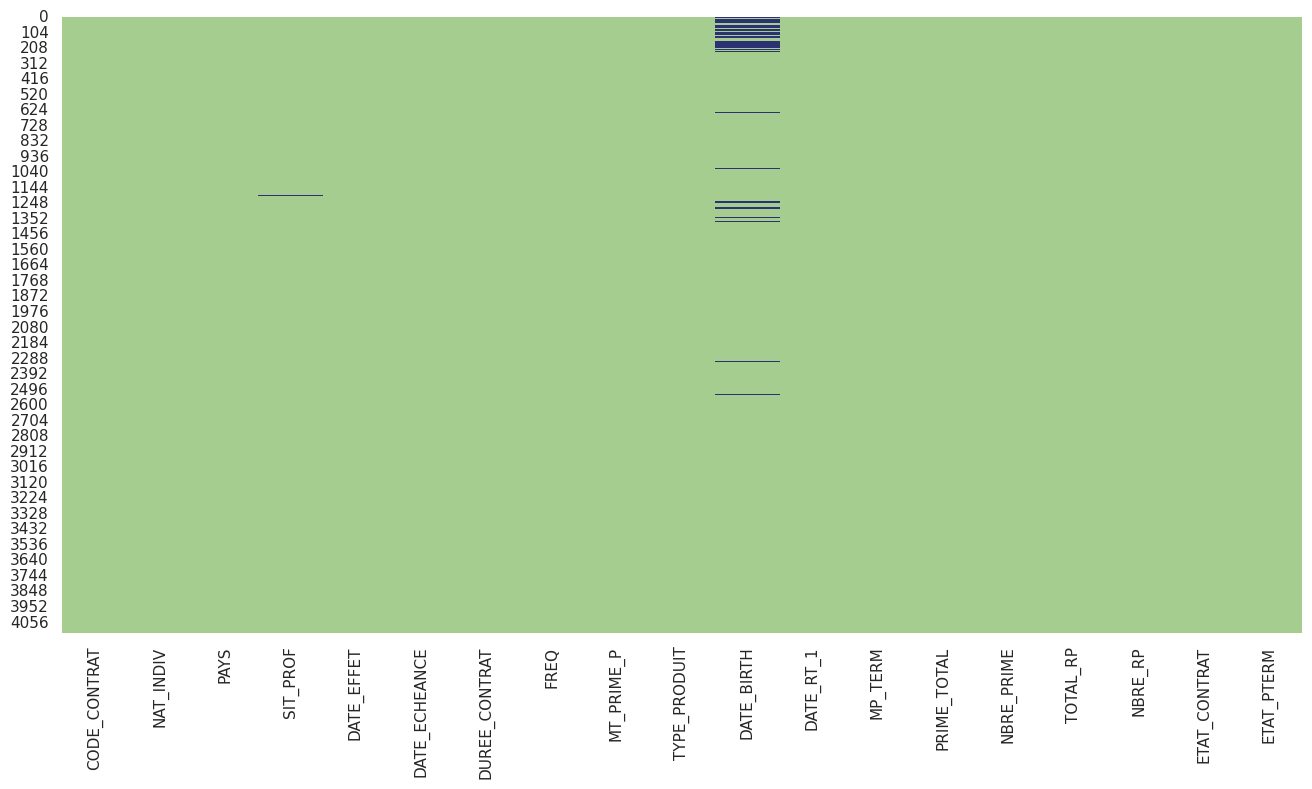

In [185]:
plt.figure(figsize=(16,8))
sns.heatmap(data.isna(),cmap="crest", cbar=False);

In [186]:
data['YEAR_BIRTH'] = data['DATE_BIRTH'].dt.year
mean = data['YEAR_BIRTH'].mean()
data['YEAR_BIRTH'] = data['YEAR_BIRTH'].fillna(mean)
data['YEAR_BIRTH'] = data['YEAR_BIRTH'].astype(int)
data

,CODE_CONTRAT,NAT_INDIV,PAYS,SIT_PROF,DATE_EFFET,DATE_ECHEANCE,DUREE_CONTRAT,FREQ,MT_PRIME_P,TYPE_PRODUIT,DATE_BIRTH,DATE_RT_1,MP_TERM,PRIME_TOTAL,NBRE_PRIME,TOTAL_RP,NBRE_RP,ETAT_CONTRAT,ETAT_PTERM,YEAR_BIRTH
0,ID000001,Mr,BENIN,COMMERCE-BUSINESS,1997-04-30,2012-03-31,15,IRREGULIER,2000000,PROD_1,1970-01-01,1900-01-01,0,24400000,22,0,0,0,0,1970
1,ID000002,Mme,BENIN,PROF LIBERALE,1997-05-30,2007-04-30,10,IRREGULIER,500000,PROD_1,NaT,1900-01-01,0,1500000,3,-1000000,1,0,0,1976
2,ID000003,Mr,BENIN,COMMERCE-BUSINESS,1997-04-30,2007-03-31,10,IRREGULIER,2000000,PROD_1,1970-01-01,1998-03-12,0,2000000,1,0,0,1,0,1970
3,ID000004,Mr,BENIN,COMMERCE-BUSINESS,1997-06-30,2007-05-31,10,IRREGULIER,2000000,PROD_1,1970-01-01,2002-09-23,0,2000000,1,0,0,1,0,1970
4,ID000005,Mme,BENIN,COMMERCE-BUSINESS,1997-07-31,2008-06-30,11,IRREGULIER,1000000,PROD_1,1970-01-01,1900-01-01,0,1000000,1,0,0,0,0,1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4121,ID004122,Mme,BENIN,ETUDIANT,2022-08-31,2032-07-31,10,MENSUEL,15000,PROD_5,1969-03-05,1900-01-01,0,15000,1,0,0,0,0,1969
4122,ID004123,Mme,BENIN,ETUDIANT,2022-08-31,2032-07-31,10,MENSUEL,15000,PROD_5,1969-03-05,1900-01-01,0,15000,1,0,0,0,0,1969
4123,ID004124,Mr,BENIN,ETUDIANT,2022-09-30,2032-08-31,10,MENSUEL,15000,PROD_5,1955-08-19,1900-01-01,0,30000,2,0,0,0,0,1955
4124,ID004125,Mr,BENIN,ETUDIANT,2022-10-31,2032-09-30,10,MENSUEL,15000,PROD_5,1959-06-07,1900-01-01,0,15000,1,0,0,0,0,1959


In [187]:
data = data.drop(['DATE_BIRTH'], axis=1)
data

,CODE_CONTRAT,NAT_INDIV,PAYS,SIT_PROF,DATE_EFFET,DATE_ECHEANCE,DUREE_CONTRAT,FREQ,MT_PRIME_P,TYPE_PRODUIT,DATE_RT_1,MP_TERM,PRIME_TOTAL,NBRE_PRIME,TOTAL_RP,NBRE_RP,ETAT_CONTRAT,ETAT_PTERM,YEAR_BIRTH
0,ID000001,Mr,BENIN,COMMERCE-BUSINESS,1997-04-30,2012-03-31,15,IRREGULIER,2000000,PROD_1,1900-01-01,0,24400000,22,0,0,0,0,1970
1,ID000002,Mme,BENIN,PROF LIBERALE,1997-05-30,2007-04-30,10,IRREGULIER,500000,PROD_1,1900-01-01,0,1500000,3,-1000000,1,0,0,1976
2,ID000003,Mr,BENIN,COMMERCE-BUSINESS,1997-04-30,2007-03-31,10,IRREGULIER,2000000,PROD_1,1998-03-12,0,2000000,1,0,0,1,0,1970
3,ID000004,Mr,BENIN,COMMERCE-BUSINESS,1997-06-30,2007-05-31,10,IRREGULIER,2000000,PROD_1,2002-09-23,0,2000000,1,0,0,1,0,1970
4,ID000005,Mme,BENIN,COMMERCE-BUSINESS,1997-07-31,2008-06-30,11,IRREGULIER,1000000,PROD_1,1900-01-01,0,1000000,1,0,0,0,0,1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4121,ID004122,Mme,BENIN,ETUDIANT,2022-08-31,2032-07-31,10,MENSUEL,15000,PROD_5,1900-01-01,0,15000,1,0,0,0,0,1969
4122,ID004123,Mme,BENIN,ETUDIANT,2022-08-31,2032-07-31,10,MENSUEL,15000,PROD_5,1900-01-01,0,15000,1,0,0,0,0,1969
4123,ID004124,Mr,BENIN,ETUDIANT,2022-09-30,2032-08-31,10,MENSUEL,15000,PROD_5,1900-01-01,0,30000,2,0,0,0,0,1955
4124,ID004125,Mr,BENIN,ETUDIANT,2022-10-31,2032-09-30,10,MENSUEL,15000,PROD_5,1900-01-01,0,15000,1,0,0,0,0,1959


In [188]:
data['MP_TERM'].unique()

array([0])

In [189]:
data['NAT_INDIV'].unique()

array(['Mr', 'Mme', 'Mlle', nan, 'STE', 'Madame', '0', '*TE', 'Mr & Mme',
       'Ets.', '1', 'Entreprise'], dtype=object)

In [190]:
data['MP_TERM'].unique()

array([0])

In [191]:
data['PAYS'].unique()

array(['BENIN', 'MALI', '???', 'GABON', 'RCI'], dtype=object)

In [192]:
data.loc[data['PAYS'] == '???']

,CODE_CONTRAT,NAT_INDIV,PAYS,SIT_PROF,DATE_EFFET,DATE_ECHEANCE,DUREE_CONTRAT,FREQ,MT_PRIME_P,TYPE_PRODUIT,DATE_RT_1,MP_TERM,PRIME_TOTAL,NBRE_PRIME,TOTAL_RP,NBRE_RP,ETAT_CONTRAT,ETAT_PTERM,YEAR_BIRTH
46,ID000047,NaN,???,ENTREPRENEUR,1997-06-30,2017-05-31,20,ANNUEL,240000,PROD_1,1900-01-01,0,1680000,7,0,0,0,0,1976
867,ID000868,Mr,???,AGENT TECHNICIEN,2010-10-31,2024-09-30,14,MENSUEL,15000,PROD_5,2015-05-28,0,685000,53,0,0,1,0,1971
1610,ID001611,Mlle,???,PROF LIBERALE,2012-06-30,2022-05-31,10,MENSUEL,20000,PROD_1,2018-08-01,0,1280000,64,0,0,1,0,2011


In [193]:
# Remplacer les valeurs '???' par 'BENIN' dans la colonne 'pays'
data.loc[data['PAYS'] == '???', 'PAYS'] = 'BENIN'
data.loc[data['PAYS'] == '???']

,CODE_CONTRAT,NAT_INDIV,PAYS,SIT_PROF,DATE_EFFET,DATE_ECHEANCE,DUREE_CONTRAT,FREQ,MT_PRIME_P,TYPE_PRODUIT,DATE_RT_1,MP_TERM,PRIME_TOTAL,NBRE_PRIME,TOTAL_RP,NBRE_RP,ETAT_CONTRAT,ETAT_PTERM,YEAR_BIRTH


In [194]:
data['ETAT_CONTRAT'].unique()

array([0, 1])

In [195]:
data.isna().sum(axis=0)

CODE_CONTRAT      0
NAT_INDIV         6
PAYS              0
SIT_PROF         14
DATE_EFFET        0
DATE_ECHEANCE     0
DUREE_CONTRAT     0
FREQ              0
MT_PRIME_P        0
TYPE_PRODUIT      0
DATE_RT_1         0
MP_TERM           0
PRIME_TOTAL       0
NBRE_PRIME        0
TOTAL_RP          0
NBRE_RP           0
ETAT_CONTRAT      0
ETAT_PTERM        0
YEAR_BIRTH        0
dtype: int64

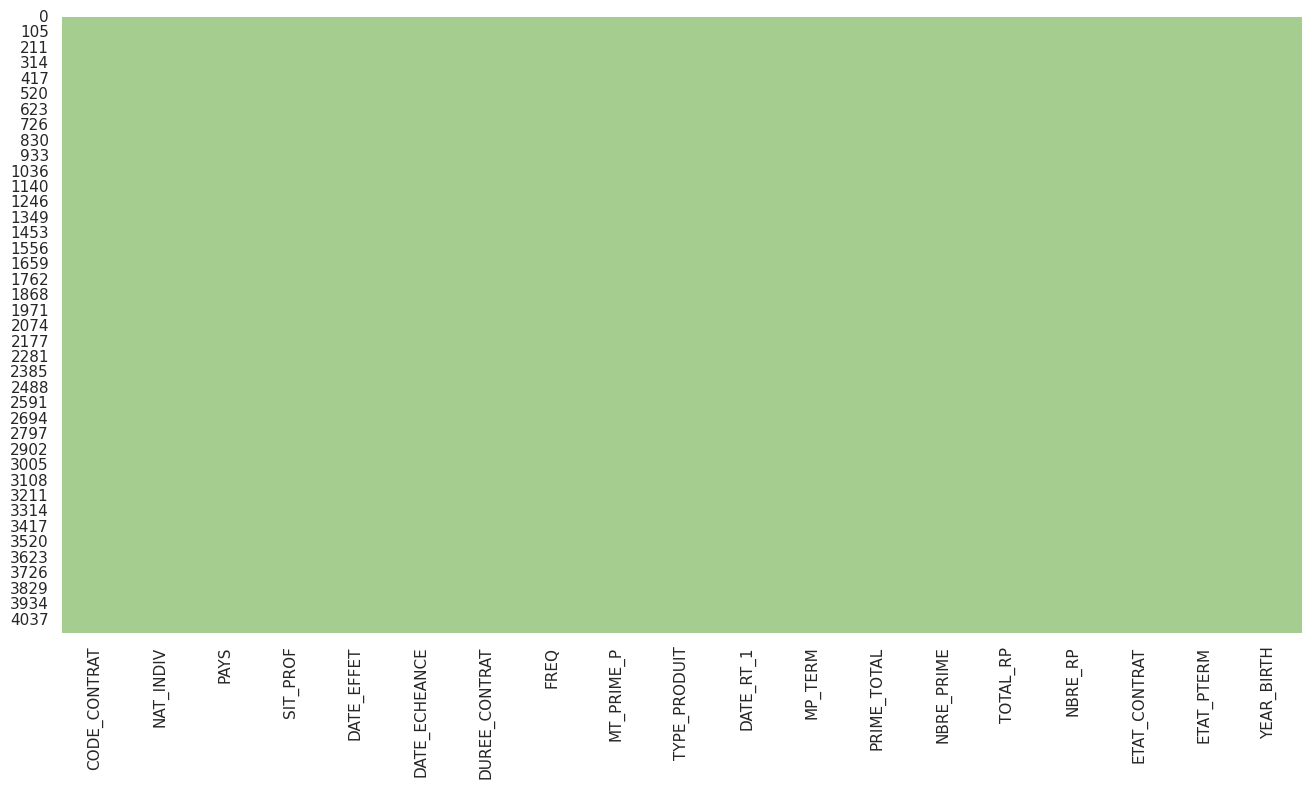

In [196]:
data = data.dropna()
plt.figure(figsize=(16,8))
sns.heatmap(data.isna(),cmap="crest", cbar=False);

In [197]:
data['NBRE_RP'] = data['NBRE_RP'].abs()
data['TOTAL_RP'] = data['TOTAL_RP'].abs()

<ipython-input-197-beeba545008b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['NBRE_RP'] = data['NBRE_RP'].abs()
<ipython-input-197-beeba545008b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TOTAL_RP'] = data['TOTAL_RP'].abs()


In [198]:
data['FREQ_RP'] = (data['NBRE_RP'] / data['TOTAL_RP'])*100
data

<ipython-input-198-a8723481fb22>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['FREQ_RP'] = (data['NBRE_RP'] / data['TOTAL_RP'])*100


,CODE_CONTRAT,NAT_INDIV,PAYS,SIT_PROF,DATE_EFFET,DATE_ECHEANCE,DUREE_CONTRAT,FREQ,MT_PRIME_P,TYPE_PRODUIT,DATE_RT_1,MP_TERM,PRIME_TOTAL,NBRE_PRIME,TOTAL_RP,NBRE_RP,ETAT_CONTRAT,ETAT_PTERM,YEAR_BIRTH,FREQ_RP
0,ID000001,Mr,BENIN,COMMERCE-BUSINESS,1997-04-30,2012-03-31,15,IRREGULIER,2000000,PROD_1,1900-01-01,0,24400000,22,0,0,0,0,1970,NaN
1,ID000002,Mme,BENIN,PROF LIBERALE,1997-05-30,2007-04-30,10,IRREGULIER,500000,PROD_1,1900-01-01,0,1500000,3,1000000,1,0,0,1976,0.0001
2,ID000003,Mr,BENIN,COMMERCE-BUSINESS,1997-04-30,2007-03-31,10,IRREGULIER,2000000,PROD_1,1998-03-12,0,2000000,1,0,0,1,0,1970,NaN
3,ID000004,Mr,BENIN,COMMERCE-BUSINESS,1997-06-30,2007-05-31,10,IRREGULIER,2000000,PROD_1,2002-09-23,0,2000000,1,0,0,1,0,1970,NaN
4,ID000005,Mme,BENIN,COMMERCE-BUSINESS,1997-07-31,2008-06-30,11,IRREGULIER,1000000,PROD_1,1900-01-01,0,1000000,1,0,0,0,0,1970,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4121,ID004122,Mme,BENIN,ETUDIANT,2022-08-31,2032-07-31,10,MENSUEL,15000,PROD_5,1900-01-01,0,15000,1,0,0,0,0,1969,NaN
4122,ID004123,Mme,BENIN,ETUDIANT,2022-08-31,2032-07-31,10,MENSUEL,15000,PROD_5,1900-01-01,0,15000,1,0,0,0,0,1969,NaN
4123,ID004124,Mr,BENIN,ETUDIANT,2022-09-30,2032-08-31,10,MENSUEL,15000,PROD_5,1900-01-01,0,30000,2,0,0,0,0,1955,NaN
4124,ID004125,Mr,BENIN,ETUDIANT,2022-10-31,2032-09-30,10,MENSUEL,15000,PROD_5,1900-01-01,0,15000,1,0,0,0,0,1959,NaN


In [199]:
mean_rp = data['FREQ_RP'].mean()
data['FREQ_RP'] = data['FREQ_RP'].fillna(mean_rp)
data

<ipython-input-199-1ea5b48e4b42>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['FREQ_RP'] = data['FREQ_RP'].fillna(mean_rp)


,CODE_CONTRAT,NAT_INDIV,PAYS,SIT_PROF,DATE_EFFET,DATE_ECHEANCE,DUREE_CONTRAT,FREQ,MT_PRIME_P,TYPE_PRODUIT,DATE_RT_1,MP_TERM,PRIME_TOTAL,NBRE_PRIME,TOTAL_RP,NBRE_RP,ETAT_CONTRAT,ETAT_PTERM,YEAR_BIRTH,FREQ_RP
0,ID000001,Mr,BENIN,COMMERCE-BUSINESS,1997-04-30,2012-03-31,15,IRREGULIER,2000000,PROD_1,1900-01-01,0,24400000,22,0,0,0,0,1970,0.000473
1,ID000002,Mme,BENIN,PROF LIBERALE,1997-05-30,2007-04-30,10,IRREGULIER,500000,PROD_1,1900-01-01,0,1500000,3,1000000,1,0,0,1976,0.000100
2,ID000003,Mr,BENIN,COMMERCE-BUSINESS,1997-04-30,2007-03-31,10,IRREGULIER,2000000,PROD_1,1998-03-12,0,2000000,1,0,0,1,0,1970,0.000473
3,ID000004,Mr,BENIN,COMMERCE-BUSINESS,1997-06-30,2007-05-31,10,IRREGULIER,2000000,PROD_1,2002-09-23,0,2000000,1,0,0,1,0,1970,0.000473
4,ID000005,Mme,BENIN,COMMERCE-BUSINESS,1997-07-31,2008-06-30,11,IRREGULIER,1000000,PROD_1,1900-01-01,0,1000000,1,0,0,0,0,1970,0.000473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4121,ID004122,Mme,BENIN,ETUDIANT,2022-08-31,2032-07-31,10,MENSUEL,15000,PROD_5,1900-01-01,0,15000,1,0,0,0,0,1969,0.000473
4122,ID004123,Mme,BENIN,ETUDIANT,2022-08-31,2032-07-31,10,MENSUEL,15000,PROD_5,1900-01-01,0,15000,1,0,0,0,0,1969,0.000473
4123,ID004124,Mr,BENIN,ETUDIANT,2022-09-30,2032-08-31,10,MENSUEL,15000,PROD_5,1900-01-01,0,30000,2,0,0,0,0,1955,0.000473
4124,ID004125,Mr,BENIN,ETUDIANT,2022-10-31,2032-09-30,10,MENSUEL,15000,PROD_5,1900-01-01,0,15000,1,0,0,0,0,1959,0.000473


In [200]:
target = data['ETAT_CONTRAT']
target.isna().sum()

0

Nous retenons que notre colonne cible de contient aucune données manquantes. 

In [201]:
test = data['ETAT_CONTRAT'] == 1
test.sum()

1266

Nous avons 1266 contrats résiliés dans notre dataset

In [202]:
test1 = data['ETAT_CONTRAT'] != 1
test1.sum()

2840

Nous avons 2840 contrats non résiliés sur notre dataset.

In [203]:
contrat_res = data [(data['ETAT_CONTRAT'] == 1) & (data['ETAT_PTERM'] == 0)]
contrat_res

,CODE_CONTRAT,NAT_INDIV,PAYS,SIT_PROF,DATE_EFFET,DATE_ECHEANCE,DUREE_CONTRAT,FREQ,MT_PRIME_P,TYPE_PRODUIT,DATE_RT_1,MP_TERM,PRIME_TOTAL,NBRE_PRIME,TOTAL_RP,NBRE_RP,ETAT_CONTRAT,ETAT_PTERM,YEAR_BIRTH,FREQ_RP
2,ID000003,Mr,BENIN,COMMERCE-BUSINESS,1997-04-30,2007-03-31,10,IRREGULIER,2000000,PROD_1,1998-03-12,0,2000000,1,0,0,1,0,1970,0.000473
3,ID000004,Mr,BENIN,COMMERCE-BUSINESS,1997-06-30,2007-05-31,10,IRREGULIER,2000000,PROD_1,2002-09-23,0,2000000,1,0,0,1,0,1970,0.000473
13,ID000014,Mr,BENIN,COMMERCE-BUSINESS,1997-09-30,2007-08-31,10,IRREGULIER,1000000,PROD_1,2004-04-13,0,1000000,1,700000,2,1,0,1970,0.000286
27,ID000028,Mr,BENIN,ENTREPRENEUR,1998-01-31,2007-12-31,10,IRREGULIER,2000000,PROD_1,1999-08-06,0,2000000,1,0,0,1,0,1970,0.000473
33,ID000034,Mr,MALI,ENTREPRENEUR,1998-02-28,2008-01-31,10,IRREGULIER,300000,PROD_1,2007-04-24,0,3400000,11,1900000,1,1,0,1976,0.000053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3985,ID003986,Mr,BENIN,ARTISAN,2020-04-30,2030-03-31,10,MENSUEL,15000,PROD_5,2022-04-22,0,315000,21,0,0,1,0,1963,0.000473
3996,ID003997,Mme,BENIN,ETUDIANT,2020-08-31,2030-07-31,10,MENSUEL,15000,PROD_5,2022-09-16,0,255000,17,0,0,1,0,1963,0.000473
4010,ID004011,Mr,BENIN,DIVERS,2020-10-31,2030-09-30,10,MENSUEL,15000,PROD_5,2022-12-07,0,135000,9,0,0,1,0,1998,0.000473
4012,ID004013,Mr,BENIN,ENSEIGNANT,2020-11-30,2030-10-31,10,MENSUEL,15000,PROD_5,2022-06-23,0,270000,18,0,0,1,0,1972,0.000473


In [204]:
total_assur = len(data)
res_percent = (len(contrat_res)/total_assur)*100
print(f"Le pourcentage de contrat résilié avant la fin du contrat est de {res_percent:.2f}% sur un total de {total_assur} contrats.")

Le pourcentage de contrat résilié avant la fin du contrat est de 30.83% sur un total de 4106 contrats.


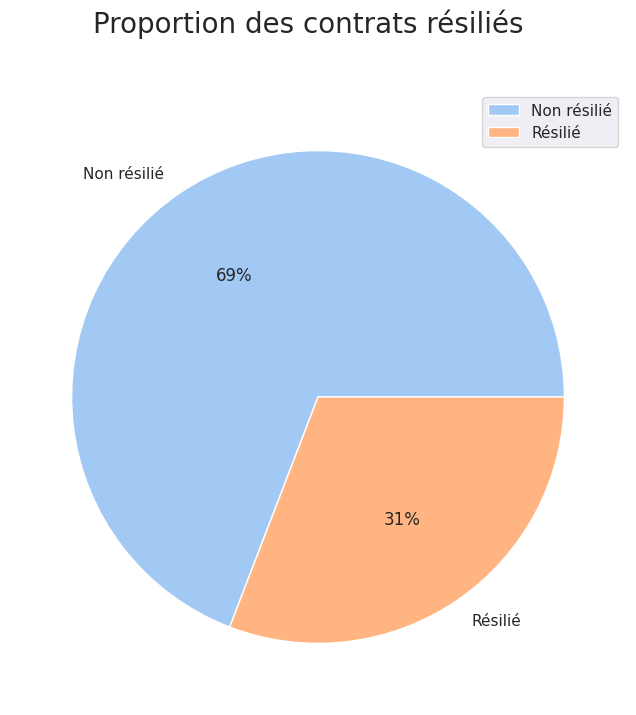

In [205]:
plt.figure(figsize = (8,8)).suptitle('Proportion des contrats résiliés', fontsize=20)
labels = ['Non résilié', 'Résilié']

#définir la palette de couleurs
colors = sns.color_palette('pastel')[0:5]

#créer un diagramme circulaire
plt.pie(data.ETAT_CONTRAT.value_counts().values, labels = labels, colors = colors, autopct='%.0f%%')
plt.legend()
plt.show()

In [206]:
#Vérification des doublures
data.duplicated().sum()

0

### Quel type de produit connais plus de résiliation ?

In [207]:
# groupons les données par type de contrat et calculer le nombre de contrats résiliés
resilie_par_type = data.groupby("TYPE_PRODUIT")["ETAT_CONTRAT"].sum()

# trier les résultats par ordre décroissant
resilie_par_type = resilie_par_type.sort_values(ascending=False)
print(f'Le nombre de contrat résilié par type de produit est : \n {resilie_par_type}')

Le nombre de contrat résilié par type de produit est : 
 TYPE_PRODUIT
PROD_1    1058
PROD_5     160
PROD_2      37
PROD_7       4
PROD_3       3
PROD_4       2
PROD_6       2
Name: ETAT_CONTRAT, dtype: int64


In [208]:
type(resilie_par_type)

pandas.core.series.Series

In [209]:
# afficher le type de contrat le plus résilié
print(f"Les types de produit les plus résiliés sont : {resilie_par_type.index[0],resilie_par_type.index[1],resilie_par_type.index[2]} avec respectivement {resilie_par_type[0], resilie_par_type[1], resilie_par_type[2]} contrats résiliés")

Les types de produit les plus résiliés sont : ('PROD_1', 'PROD_5', 'PROD_2') avec respectivement (1058, 160, 37) contrats résiliés


### La durée du contrat influence-t-elle la résiliation des contrats ?

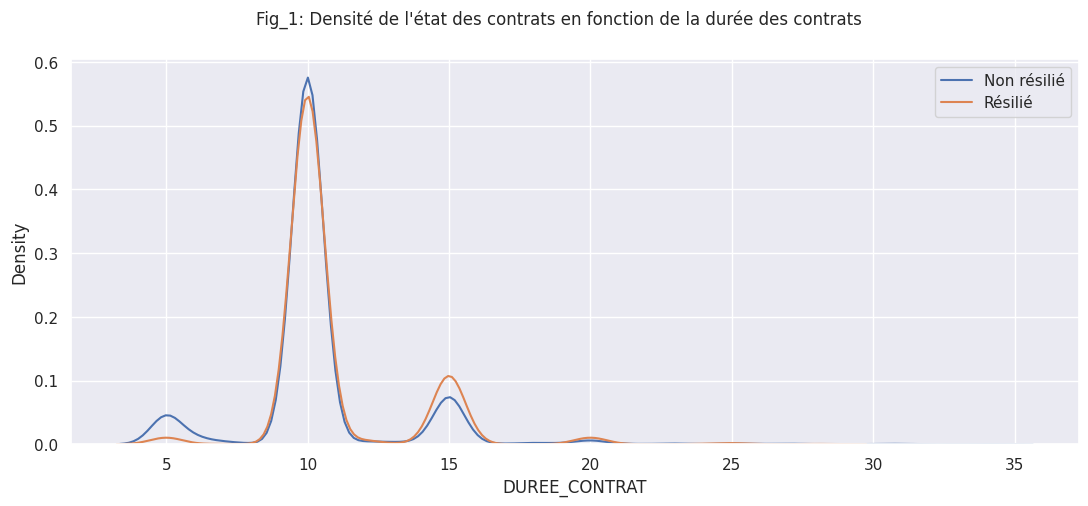

In [210]:
plt.figure(figsize = (13,5)).suptitle('Fig_1: Densité de l\'état des contrats en fonction de la durée des contrats', fontsize=12)

sns.kdeplot(data[data.ETAT_CONTRAT == 0].DUREE_CONTRAT,label='Non résilié')
sns.kdeplot(data[data.ETAT_CONTRAT == 1].DUREE_CONTRAT,label='Résilié')
plt.legend()
plt.show()

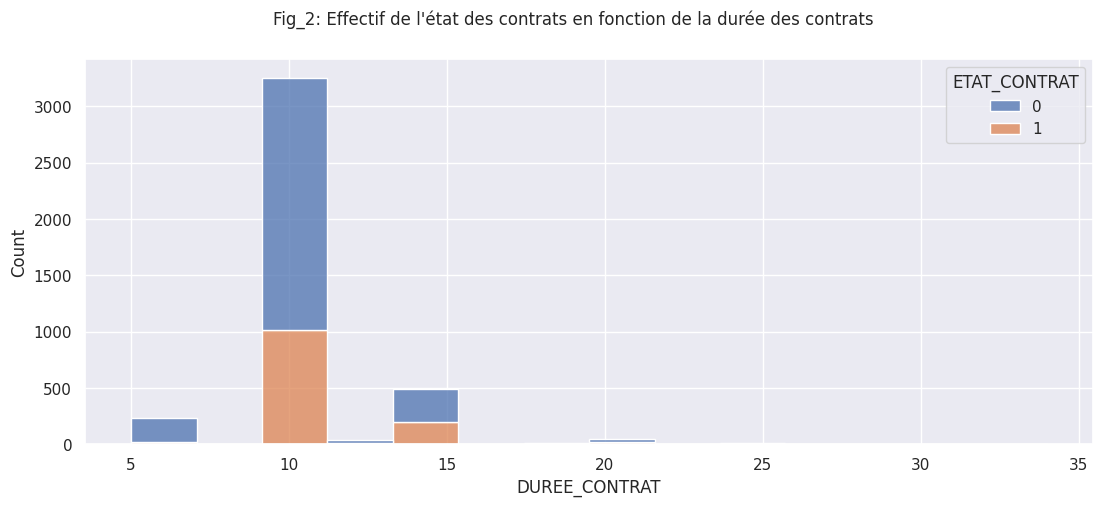

In [211]:
plt.figure(figsize = (13,5)).suptitle('Fig_2: Effectif de l\'état des contrats en fonction de la durée des contrats', fontsize=12)
sns.histplot(data=data, x='DUREE_CONTRAT', hue='ETAT_CONTRAT', multiple='stack')
plt.show()

Après observation de ses deux visualisations, on pourrait considérer DUREE_CONTRAT comme un facteur qui influence la résiliation des contrats. D'autant puisque fig 1 nous montre une densité de probanilité élevé avec les contrat de durée 10ans et 15 ans.

In [212]:
data['DUREE_CONTRAT'].max()

34

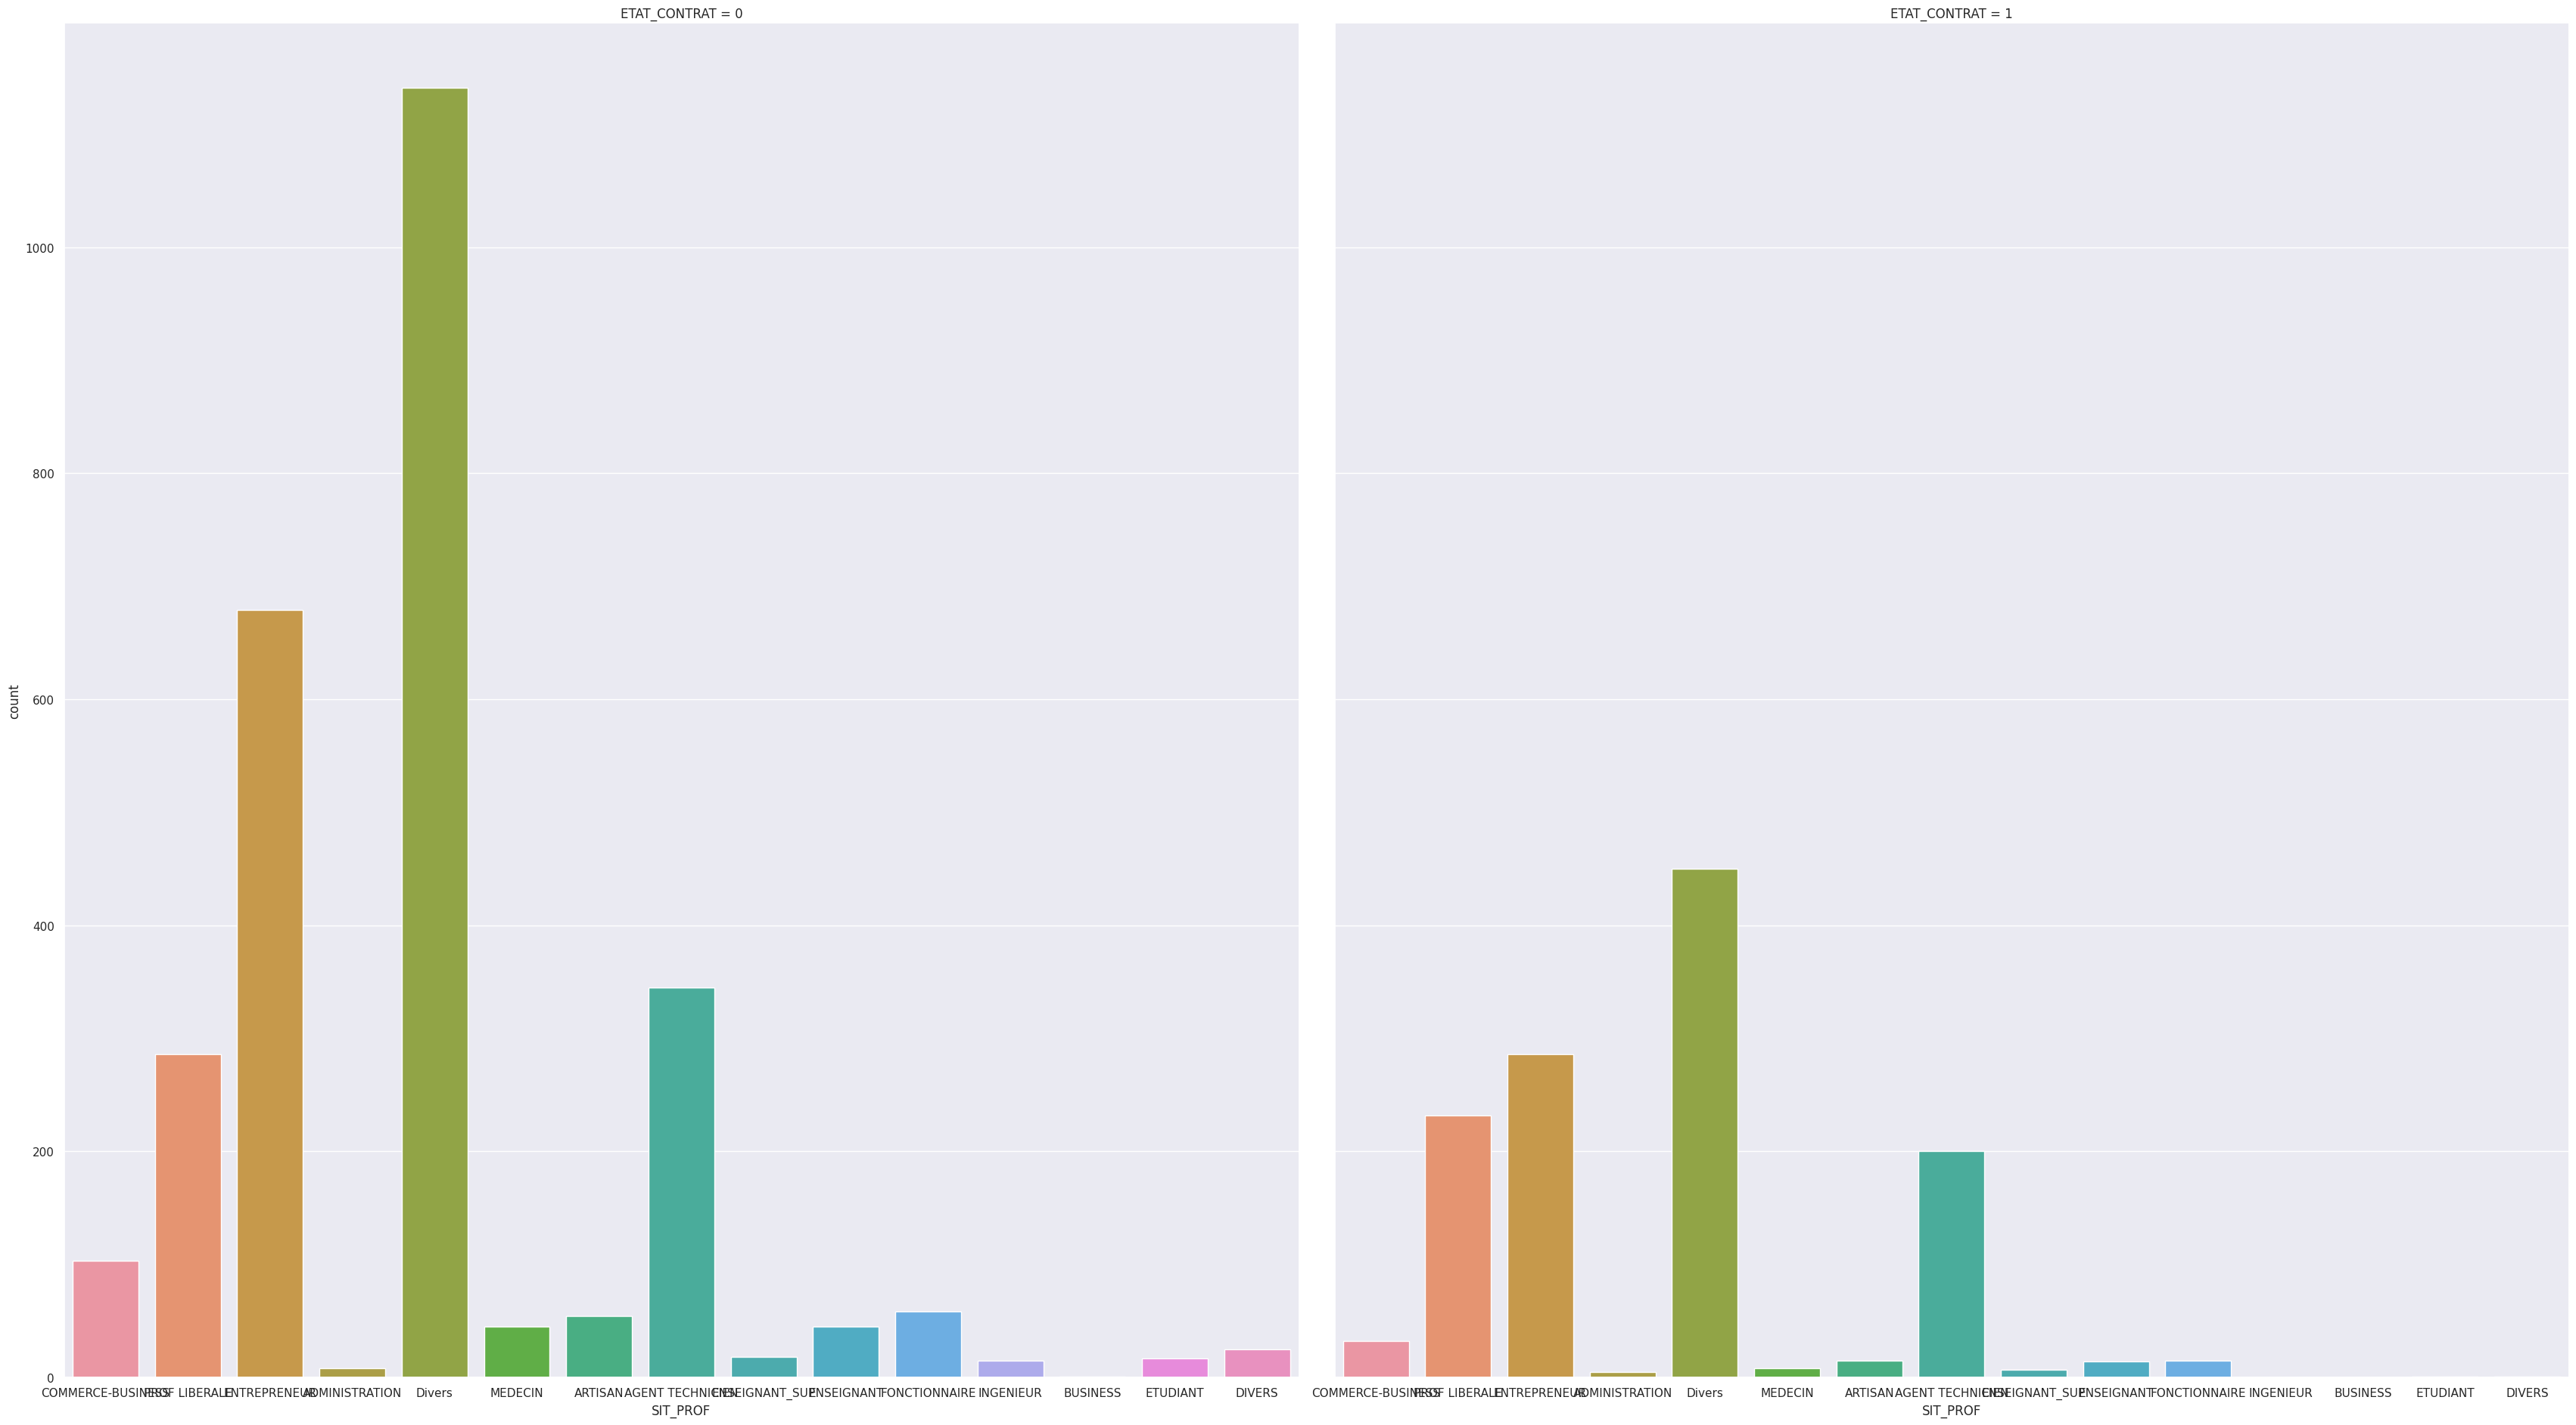

In [213]:
sns.set(rc={'figure.figsize':(6,6)})
sns.catplot(x="SIT_PROF", col="ETAT_CONTRAT", data=data, kind="count",  height=19, aspect=0.9);

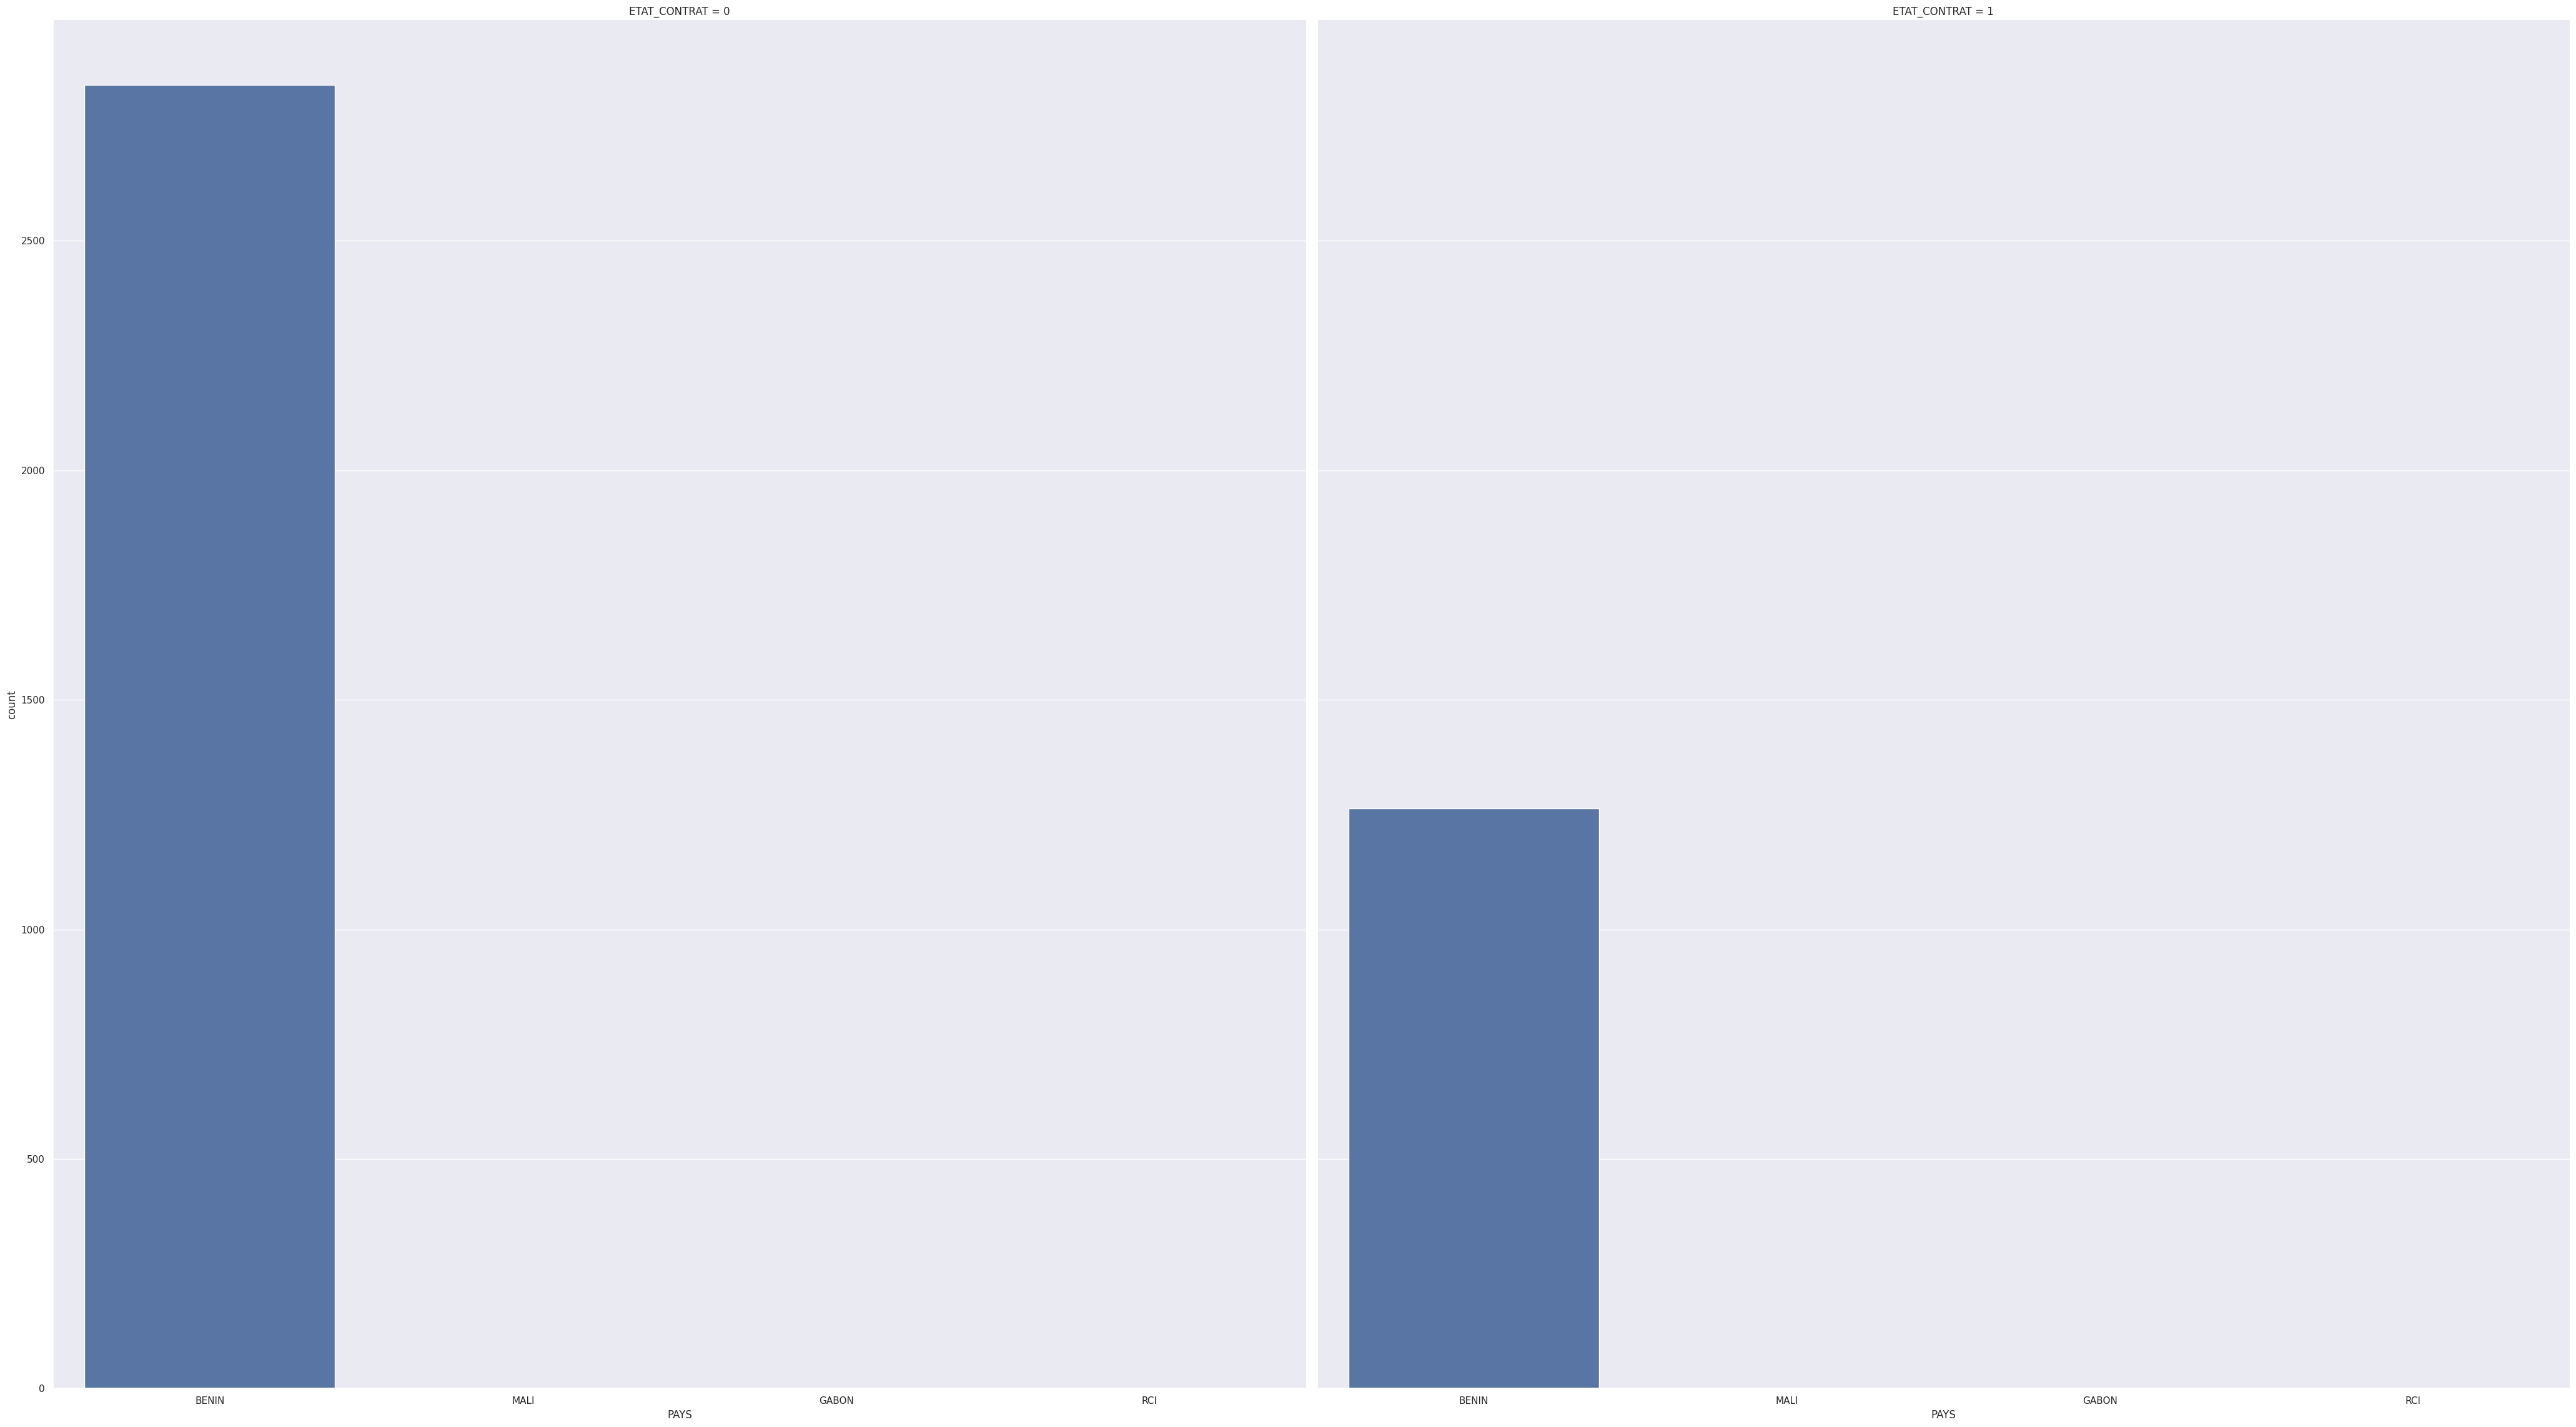

In [214]:
sns.catplot(x="PAYS", col="ETAT_CONTRAT", data=data, kind="count",  height=23, aspect=0.9);

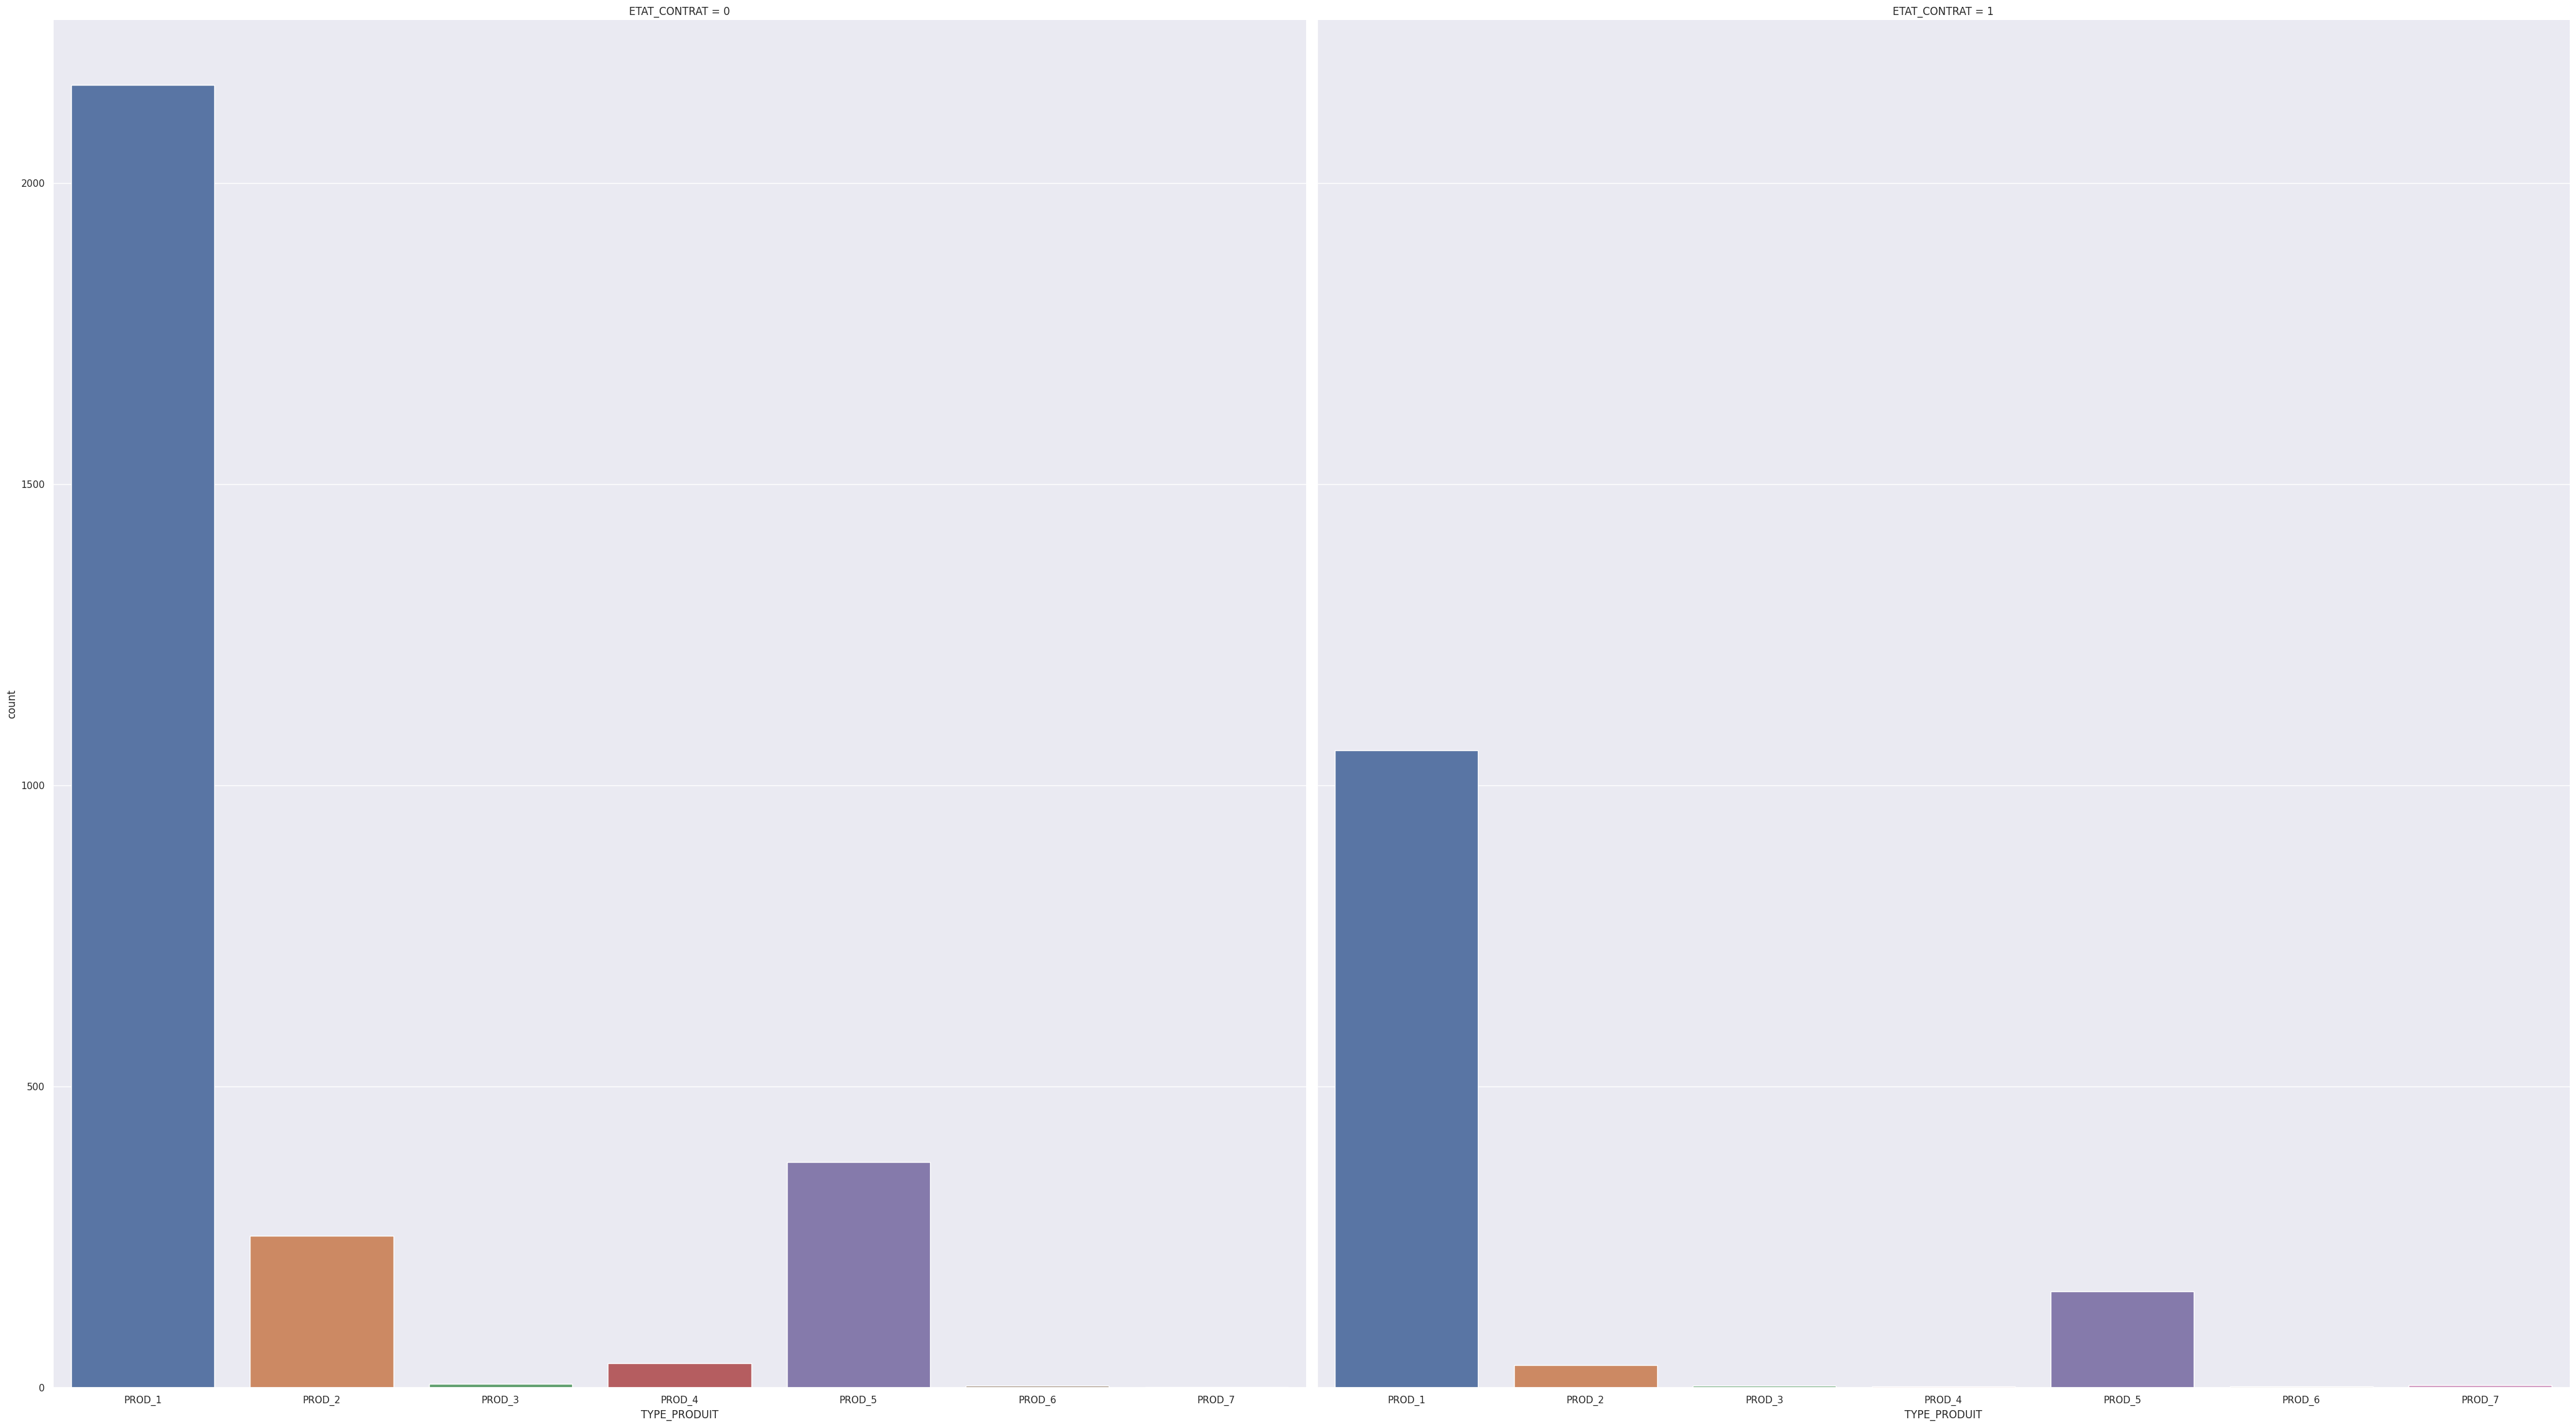

In [215]:
sns.catplot(x="TYPE_PRODUIT", col="ETAT_CONTRAT", data=data, kind="count",  height=23, aspect=0.9);

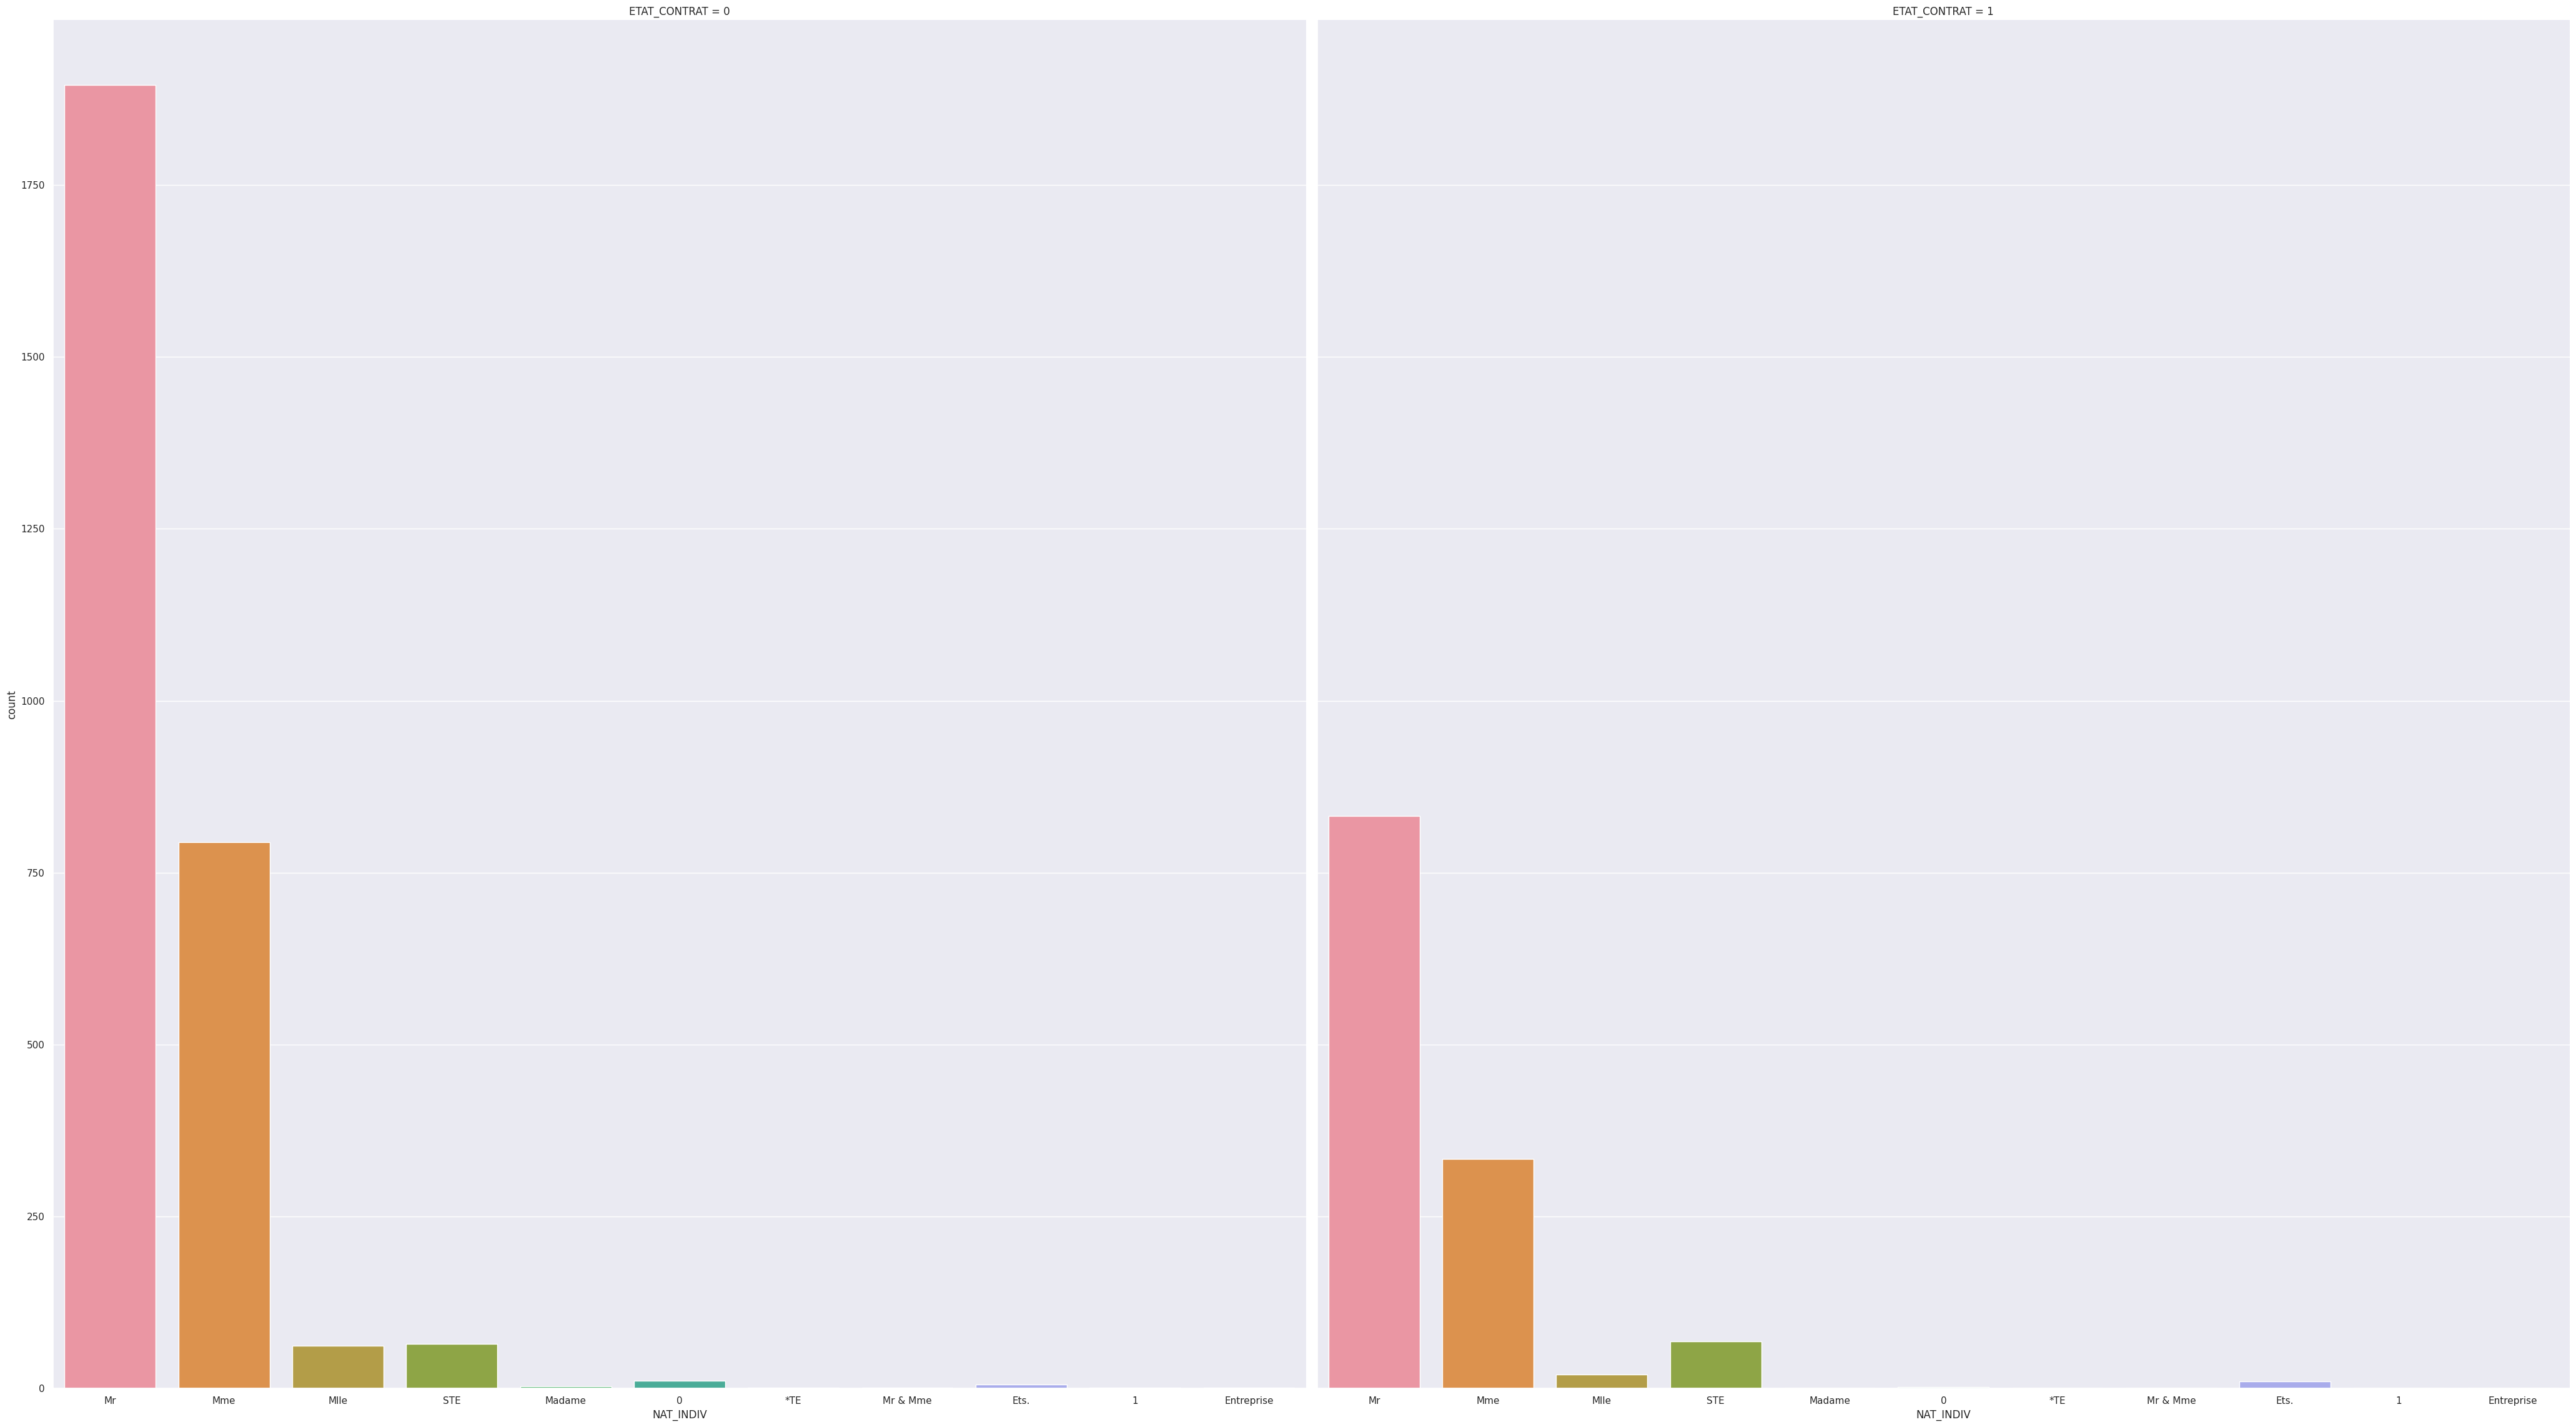

In [216]:
sns.catplot(x="NAT_INDIV", col="ETAT_CONTRAT", data=data, kind="count",  height=23, aspect=0.9);

### Vérification des variables correlées entre elles

In [217]:
# correlation between variables
#sns.set()
#sns.pairplot(data, kind='reg')

In [218]:
#sns.set()
#sns.pairplot(data, hue='ETAT_CONTRAT', kind='reg')

<ipython-input-219-9fc3c586bf60>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(data.corr(), dtype=bool))
<ipython-input-219-9fc3c586bf60>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), mask=mask, annot = True, vmin= -1.0, vmax= 1.0, center = 0, cmap = 'RdBu_r')


<Axes: >

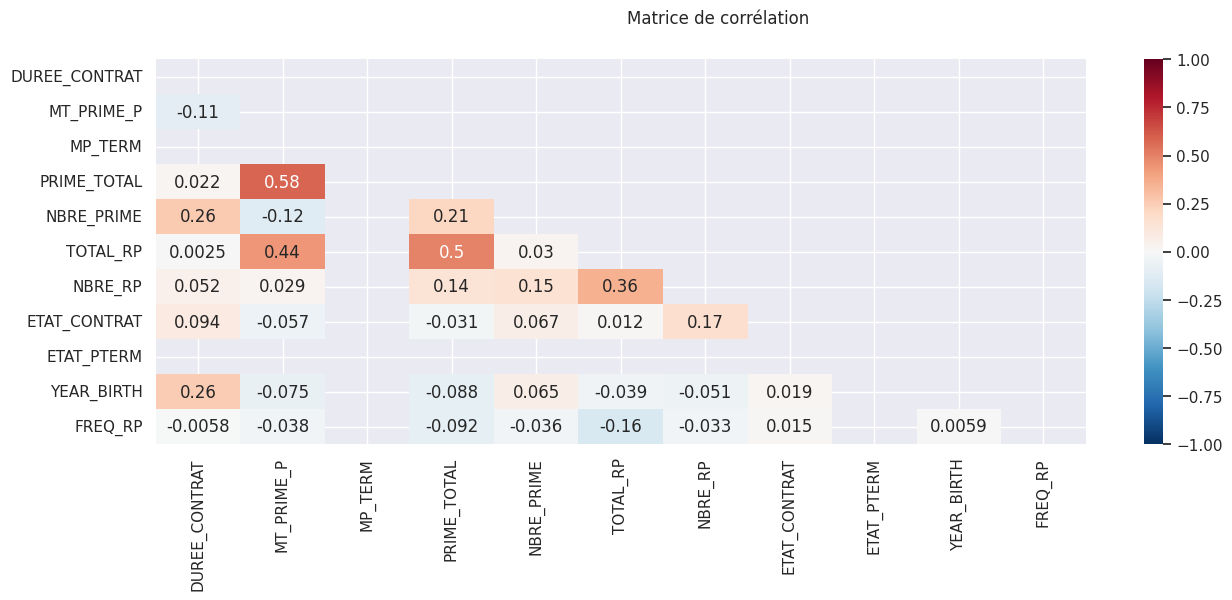

In [219]:
mask = np.triu(np.ones_like(data.corr(), dtype=bool))

plt.figure(figsize = (15,5)).suptitle('Matrice de corrélation', fontsize=12)
sns.heatmap(data.corr(), mask=mask, annot = True, vmin= -1.0, vmax= 1.0, center = 0, cmap = 'RdBu_r')

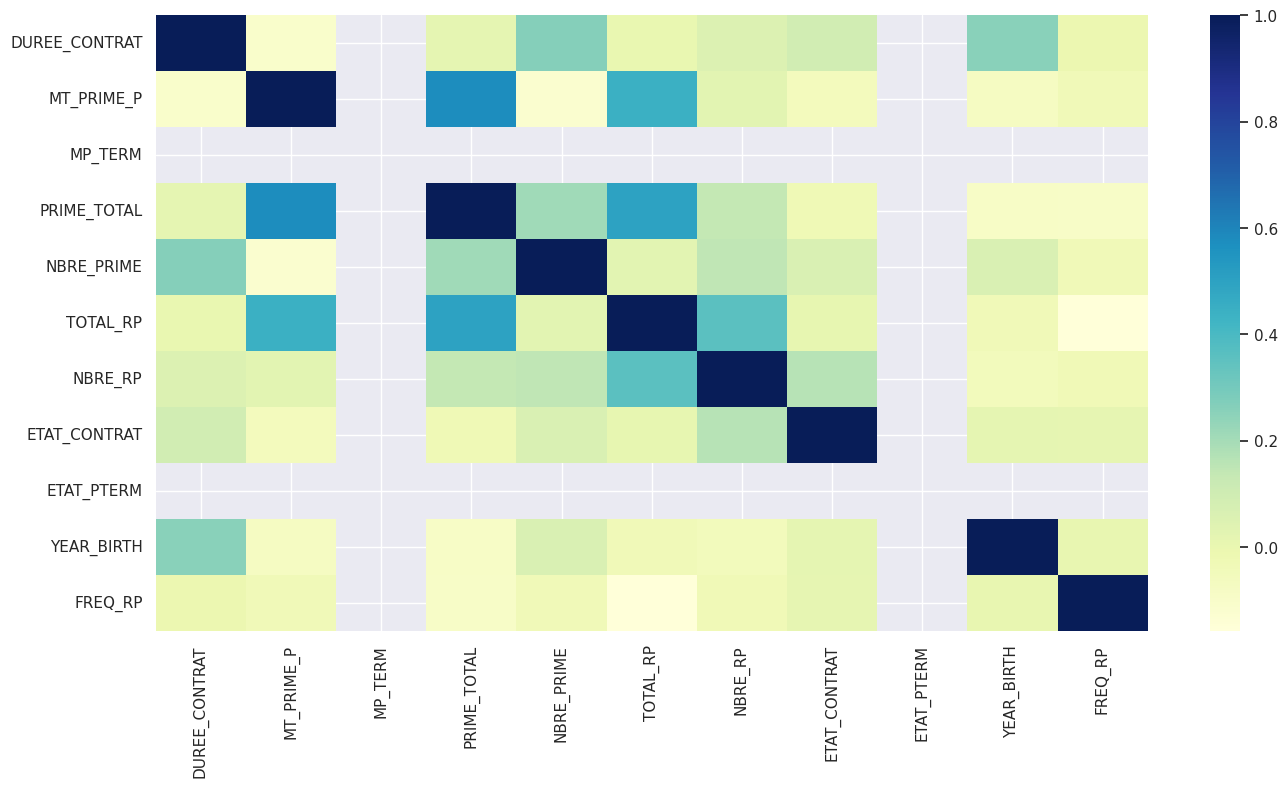

In [220]:
# Identification des variables ayant une forte corrélation entre elles

plt.figure(figsize=(16,8))
sns.heatmap(data.corr(numeric_only=True), cmap="YlGnBu");

<ipython-input-221-f4194b907723>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(data.corr()[['ETAT_CONTRAT']].sort_values(by='ETAT_CONTRAT', ascending=True), annot=True, cmap='YlGnBu')


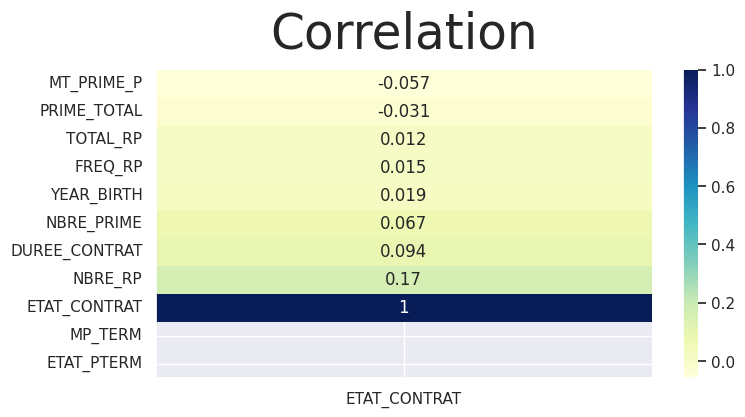

In [221]:
plt.figure(figsize=(8,4))
heatmap = sns.heatmap(data.corr()[['ETAT_CONTRAT']].sort_values(by='ETAT_CONTRAT', ascending=True), annot=True, cmap='YlGnBu')
heatmap.set_title('Correlation', fontdict={'fontsize':35}, pad=16);
sns.despine()
plt.show()

In [222]:
data = data.drop(['MP_TERM','ETAT_PTERM'], axis=1)
data

,CODE_CONTRAT,NAT_INDIV,PAYS,SIT_PROF,DATE_EFFET,DATE_ECHEANCE,DUREE_CONTRAT,FREQ,MT_PRIME_P,TYPE_PRODUIT,DATE_RT_1,PRIME_TOTAL,NBRE_PRIME,TOTAL_RP,NBRE_RP,ETAT_CONTRAT,YEAR_BIRTH,FREQ_RP
0,ID000001,Mr,BENIN,COMMERCE-BUSINESS,1997-04-30,2012-03-31,15,IRREGULIER,2000000,PROD_1,1900-01-01,24400000,22,0,0,0,1970,0.000473
1,ID000002,Mme,BENIN,PROF LIBERALE,1997-05-30,2007-04-30,10,IRREGULIER,500000,PROD_1,1900-01-01,1500000,3,1000000,1,0,1976,0.000100
2,ID000003,Mr,BENIN,COMMERCE-BUSINESS,1997-04-30,2007-03-31,10,IRREGULIER,2000000,PROD_1,1998-03-12,2000000,1,0,0,1,1970,0.000473
3,ID000004,Mr,BENIN,COMMERCE-BUSINESS,1997-06-30,2007-05-31,10,IRREGULIER,2000000,PROD_1,2002-09-23,2000000,1,0,0,1,1970,0.000473
4,ID000005,Mme,BENIN,COMMERCE-BUSINESS,1997-07-31,2008-06-30,11,IRREGULIER,1000000,PROD_1,1900-01-01,1000000,1,0,0,0,1970,0.000473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4121,ID004122,Mme,BENIN,ETUDIANT,2022-08-31,2032-07-31,10,MENSUEL,15000,PROD_5,1900-01-01,15000,1,0,0,0,1969,0.000473
4122,ID004123,Mme,BENIN,ETUDIANT,2022-08-31,2032-07-31,10,MENSUEL,15000,PROD_5,1900-01-01,15000,1,0,0,0,1969,0.000473
4123,ID004124,Mr,BENIN,ETUDIANT,2022-09-30,2032-08-31,10,MENSUEL,15000,PROD_5,1900-01-01,30000,2,0,0,0,1955,0.000473
4124,ID004125,Mr,BENIN,ETUDIANT,2022-10-31,2032-09-30,10,MENSUEL,15000,PROD_5,1900-01-01,15000,1,0,0,0,1959,0.000473


<ipython-input-223-f4194b907723>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(data.corr()[['ETAT_CONTRAT']].sort_values(by='ETAT_CONTRAT', ascending=True), annot=True, cmap='YlGnBu')


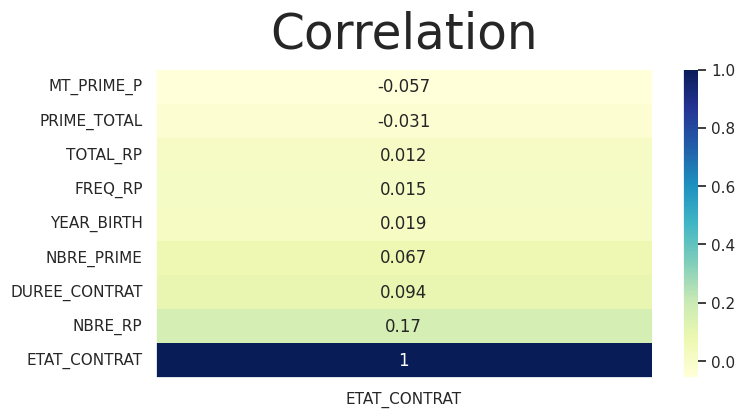

In [223]:
plt.figure(figsize=(8,4))
heatmap = sns.heatmap(data.corr()[['ETAT_CONTRAT']].sort_values(by='ETAT_CONTRAT', ascending=True), annot=True, cmap='YlGnBu')
heatmap.set_title('Correlation', fontdict={'fontsize':35}, pad=16);
sns.despine()
plt.show()

In [224]:
#Pour utiliser des fonctions de scipy afin vérifier la corrélation entre une variable binaire (de type 0,1) et des variables à montant élevé
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [225]:
import scipy.stats as stats

# Calculer la corrélation de point bisérial
correlation, pvalue = stats.pointbiserialr(data['ETAT_CONTRAT'], data['DUREE_CONTRAT'])

# Afficher la corrélation et la p-valeur
print("Corrélation de point bisérial : ", correlation)
print("p-valeur : ", pvalue)

Corrélation de point bisérial :  0.0935540510609466
p-valeur :  1.9002218598744595e-09


La corrélation de point bisérial est de 0,094, ce qui indique une corrélation positive faible entre ETAT_CONTRAT et DUREE_CONTRAT. La p-valeur est très faible (inférieure à 0,01), ce qui suggère que cette corrélation est statistiquement significative et qu'elle n'a pas été obtenue par hasard. Par conséquent, nous pouvons conclure que la variable ETAT_CONTRAT et la variable DUREE_CONTRAT sont liées de manière significative, bien que la force de cette relation soit faible.

In [226]:
# Calculer la corrélation de point bisérial
correlation, pvalue = stats.pointbiserialr(data['ETAT_CONTRAT'], data['MT_PRIME_P'])

# Afficher la corrélation et la p-valeur
print("Corrélation de point bisérial : ", correlation)
print("p-valeur : ", pvalue)

Corrélation de point bisérial :  -0.05708546011109863
p-valeur :  0.00025241486475685327


La corrélation de point bisérial est de -0,057, ce qui indique une corrélation négative faible entre la variable ETAT_CONTRAT et la variable MT_PRIME_P. La p-valeur est très faible (inférieure à 0,01), ce qui suggère que cette corrélation est statistiquement significative et qu'elle n'a pas été obtenue par hasard. Par conséquent, nous pouvons conclure que la variable ETAT_CONTRAT et la variable MT_PRIME_P sont liées de manière significative, bien que la force de cette relation soit faible. La corrélation négative suggère que lorsque la valeur de la variable ETAT_CONTRAT augmente, la valeur de la variable MT_PRIME_P diminue, et vice versa. Les résultats confirment donc une relation significative entre les variables, bien que faible et négative dans ce cas-ci.

In [227]:
# Calculer la corrélation de point bisérial
correlation, pvalue = stats.pointbiserialr(data['ETAT_CONTRAT'], data['PRIME_TOTAL'])

# Afficher la corrélation et la p-valeur
print("Corrélation de point bisérial : ", correlation)
print("p-valeur : ", pvalue)

Corrélation de point bisérial :  -0.030773489220753333
p-valeur :  0.04863557312985859


La corrélation de point bisérial est de -0,031, ce qui indique une corrélation négative très faible entre la variable ETAT_CONTRAT et la variable PRIME_TOTAL. La p-valeur est proche de 0,05, ce qui suggère que cette corrélation est statistiquement significative mais à la limite de l'acceptabilité. Par conséquent, nous pouvons conclure que la variable ETAT_CONTRAT et la variable PRIME_TOTAL sont liées de manière significative, mais la force de cette relation est très faible.

In [228]:
# Calculer la corrélation de point bisérial
correlation, pvalue = stats.pointbiserialr(data['ETAT_CONTRAT'], data['NBRE_PRIME'])

# Afficher la corrélation et la p-valeur
print("Corrélation de point bisérial : ", correlation)
print("p-valeur : ", pvalue)

Corrélation de point bisérial :  0.06709051107915748
p-valeur :  1.688282336253642e-05


La corrélation de point bisérial est de 0,067, ce qui indique une corrélation positive faible entre la variable ETAT_CONTRAT et la variable NBRE_PRIME. La p-valeur est très faible (inférieure à 0,01), ce qui suggère que cette corrélation est statistiquement significative et qu'elle n'a pas été obtenue par hasard. Par conséquent, nous pouvons conclure que la variable ETAT_CONTRAT et la variable NBRE_PRIME sont liées de manière significative, bien que la force de cette relation soit faible.

In [229]:
# Calculer la corrélation de point bisérial
correlation, pvalue = stats.pointbiserialr(data['ETAT_CONTRAT'], data['TOTAL_RP'])

# Afficher la corrélation et la p-valeur
print("Corrélation de point bisérial : ", correlation)
print("p-valeur : ", pvalue)

Corrélation de point bisérial :  0.011985693887812903
p-valeur :  0.4425977229629796


La corrélation de point bisérial est de -0,012, ce qui indique une corrélation très faible et pratiquement nulle entre la variable ETAT_CONTRAT et la variable TOTAL_RP. La p-valeur est supérieure à 0,05, ce qui suggère que cette corrélation n'est pas statistiquement significative et qu'elle pourrait être due au hasard. Par conséquent, nous pouvons conclure que la variable ETAT_CONTRAT et la variable TOTAL_RP ne sont pas liées de manière significative.

In [230]:
# Calculer la corrélation de point bisérial
correlation, pvalue = stats.pointbiserialr(data['ETAT_CONTRAT'], data['NBRE_RP'])

# Afficher la corrélation et la p-valeur
print("Corrélation de point bisérial : ", correlation)
print("p-valeur : ", pvalue)

Corrélation de point bisérial :  0.16575508333816322
p-valeur :  1.1086551717001805e-26


La corrélation de point bisérial est de 0,166, ce qui indique une corrélation positive modérée entre la variable ETAT_CONTRAT et la variable NBRE_RP. La p-valeur est très faible (inférieure à 0,01), ce qui suggère que cette corrélation est statistiquement significative et qu'elle n'a pas été obtenue par hasard. Par conséquent, nous pouvons conclure que la variable ETAT_CONTRAT et la variable NBRE_RP sont liées de manière significative, avec une force de relation modérée. 

In [231]:
data.columns

Index(['CODE_CONTRAT', 'NAT_INDIV', 'PAYS', 'SIT_PROF', 'DATE_EFFET',
       'DATE_ECHEANCE', 'DUREE_CONTRAT', 'FREQ', 'MT_PRIME_P', 'TYPE_PRODUIT',
       'DATE_RT_1', 'PRIME_TOTAL', 'NBRE_PRIME', 'TOTAL_RP', 'NBRE_RP',
       'ETAT_CONTRAT', 'YEAR_BIRTH', 'FREQ_RP'],
      dtype='object')

### Visualisation Boxplot

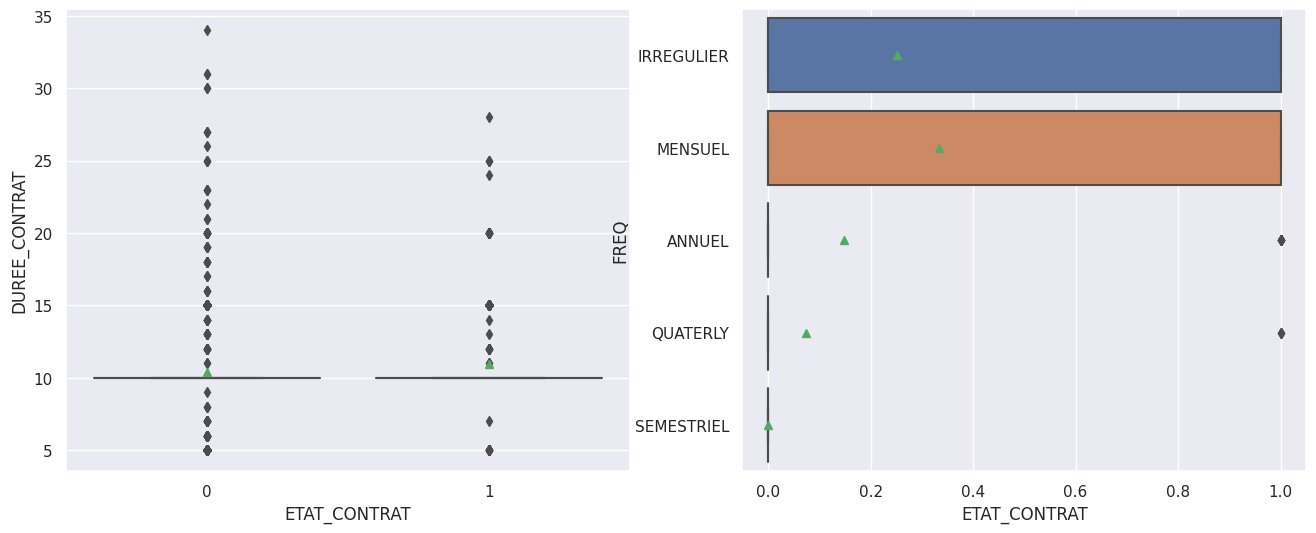

In [232]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))
plt.ticklabel_format(style='plain', axis='y')

sns.boxplot(x= data["ETAT_CONTRAT"], y = data["DUREE_CONTRAT"], data= data, ax=axes[0], showmeans=True);
sns.boxplot(x= data["ETAT_CONTRAT"], y = data["FREQ"], data= data, ax=axes[1], showmeans=True);

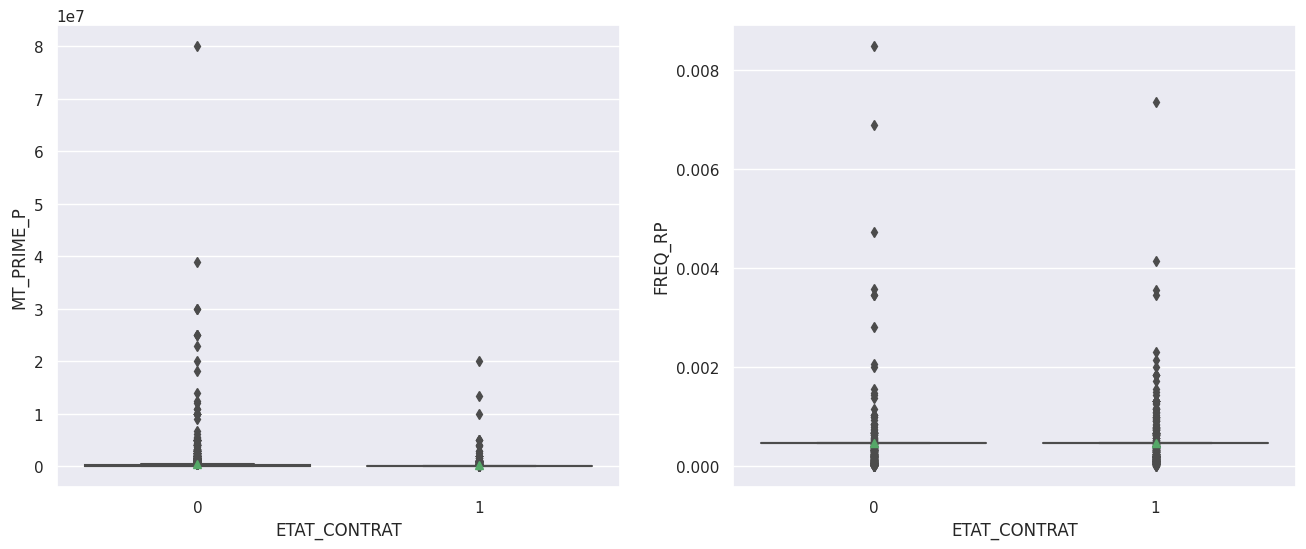

In [233]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))
plt.ticklabel_format(style='plain', axis='y')

sns.boxplot(x= data["ETAT_CONTRAT"], y = data["MT_PRIME_P"], data= data, ax=axes[0], showmeans=True);
sns.boxplot(x= data["ETAT_CONTRAT"], y = data["FREQ_RP"], data= data, ax=axes[1], showmeans=True);

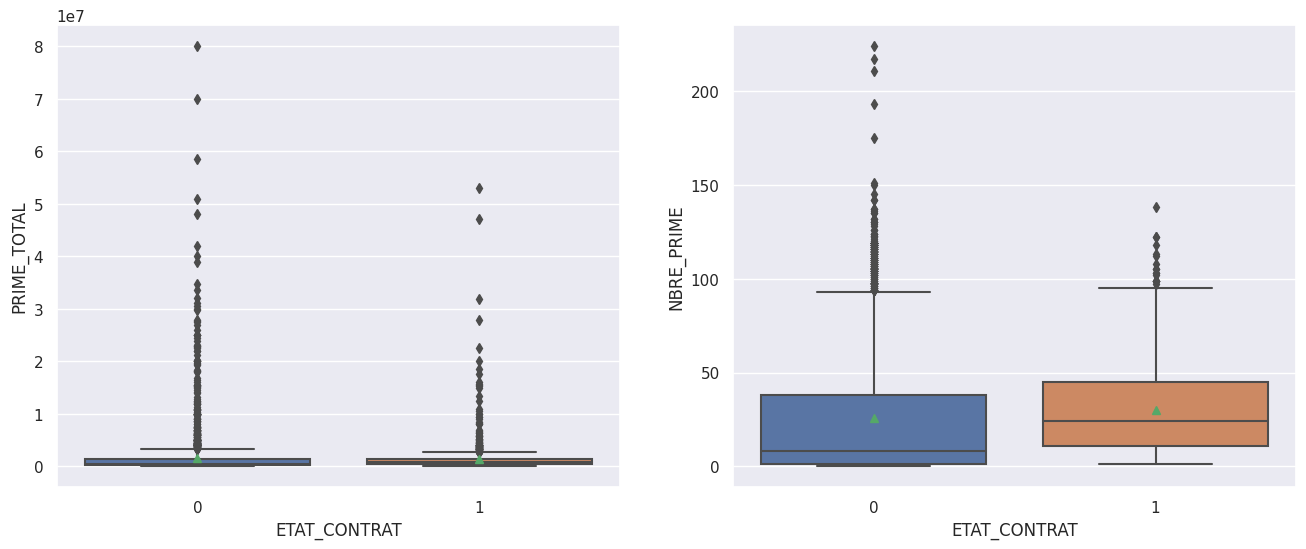

In [234]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))
plt.ticklabel_format(style='plain', axis='y')

sns.boxplot(x= data["ETAT_CONTRAT"], y = data["PRIME_TOTAL"], data= data, ax=axes[0], showmeans=True);
sns.boxplot(x= data["ETAT_CONTRAT"], y = data["NBRE_PRIME"], data= data, ax=axes[1], showmeans=True);

In [235]:
# calculer l'âge à partir de la date de naissance et la date actuelle
today = date.today().year
data['AGE'] = today - data['YEAR_BIRTH']
data['AGE'] = data['AGE'].astype(int)
data

,CODE_CONTRAT,NAT_INDIV,PAYS,SIT_PROF,DATE_EFFET,DATE_ECHEANCE,DUREE_CONTRAT,FREQ,MT_PRIME_P,TYPE_PRODUIT,DATE_RT_1,PRIME_TOTAL,NBRE_PRIME,TOTAL_RP,NBRE_RP,ETAT_CONTRAT,YEAR_BIRTH,FREQ_RP,AGE
0,ID000001,Mr,BENIN,COMMERCE-BUSINESS,1997-04-30,2012-03-31,15,IRREGULIER,2000000,PROD_1,1900-01-01,24400000,22,0,0,0,1970,0.000473,53
1,ID000002,Mme,BENIN,PROF LIBERALE,1997-05-30,2007-04-30,10,IRREGULIER,500000,PROD_1,1900-01-01,1500000,3,1000000,1,0,1976,0.000100,47
2,ID000003,Mr,BENIN,COMMERCE-BUSINESS,1997-04-30,2007-03-31,10,IRREGULIER,2000000,PROD_1,1998-03-12,2000000,1,0,0,1,1970,0.000473,53
3,ID000004,Mr,BENIN,COMMERCE-BUSINESS,1997-06-30,2007-05-31,10,IRREGULIER,2000000,PROD_1,2002-09-23,2000000,1,0,0,1,1970,0.000473,53
4,ID000005,Mme,BENIN,COMMERCE-BUSINESS,1997-07-31,2008-06-30,11,IRREGULIER,1000000,PROD_1,1900-01-01,1000000,1,0,0,0,1970,0.000473,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4121,ID004122,Mme,BENIN,ETUDIANT,2022-08-31,2032-07-31,10,MENSUEL,15000,PROD_5,1900-01-01,15000,1,0,0,0,1969,0.000473,54
4122,ID004123,Mme,BENIN,ETUDIANT,2022-08-31,2032-07-31,10,MENSUEL,15000,PROD_5,1900-01-01,15000,1,0,0,0,1969,0.000473,54
4123,ID004124,Mr,BENIN,ETUDIANT,2022-09-30,2032-08-31,10,MENSUEL,15000,PROD_5,1900-01-01,30000,2,0,0,0,1955,0.000473,68
4124,ID004125,Mr,BENIN,ETUDIANT,2022-10-31,2032-09-30,10,MENSUEL,15000,PROD_5,1900-01-01,15000,1,0,0,0,1959,0.000473,64


In [236]:
data['AGE'] = data['AGE'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4106 entries, 0 to 4125
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CODE_CONTRAT   4106 non-null   object        
 1   NAT_INDIV      4106 non-null   object        
 2   PAYS           4106 non-null   object        
 3   SIT_PROF       4106 non-null   object        
 4   DATE_EFFET     4106 non-null   datetime64[ns]
 5   DATE_ECHEANCE  4106 non-null   datetime64[ns]
 6   DUREE_CONTRAT  4106 non-null   int64         
 7   FREQ           4106 non-null   object        
 8   MT_PRIME_P     4106 non-null   int64         
 9   TYPE_PRODUIT   4106 non-null   object        
 10  DATE_RT_1      4106 non-null   datetime64[ns]
 11  PRIME_TOTAL    4106 non-null   int64         
 12  NBRE_PRIME     4106 non-null   int64         
 13  TOTAL_RP       4106 non-null   int64         
 14  NBRE_RP        4106 non-null   int64         
 15  ETAT_CONTRAT   4106 n

In [237]:
# Calculer la corrélation de point bisérial
correlation, pvalue = stats.pointbiserialr(data['ETAT_CONTRAT'], data['AGE'])

# Afficher la corrélation et la p-valeur
print("Corrélation de point bisérial : ", correlation)
print("p-valeur : ", pvalue)

Corrélation de point bisérial :  -0.018879972567198686
p-valeur :  0.2264586054457926


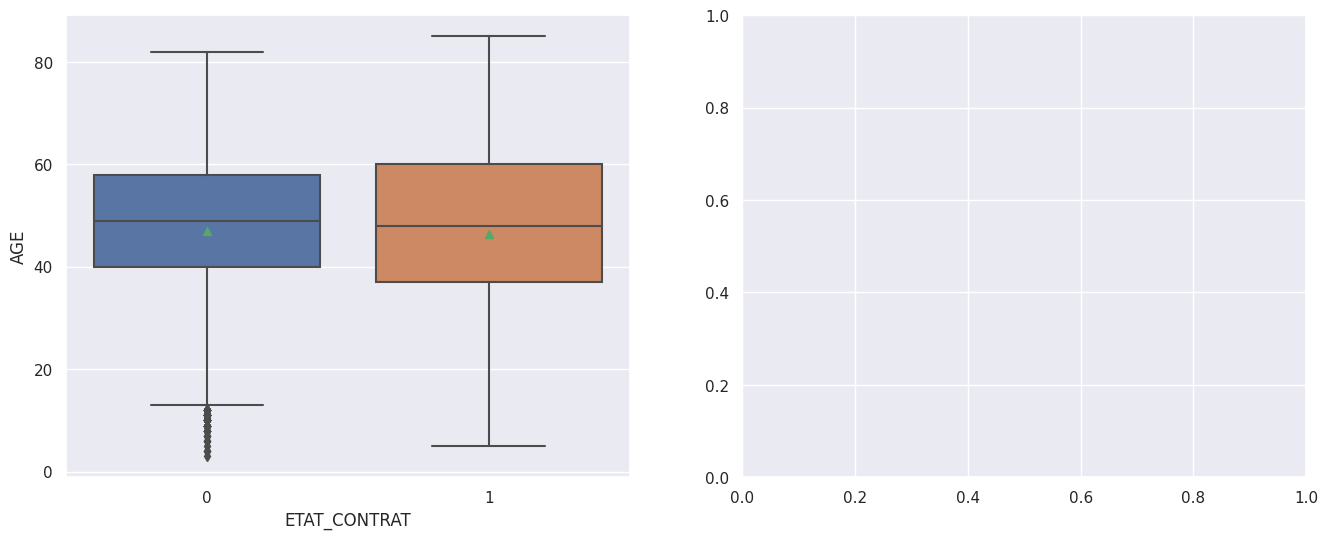

In [238]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))
plt.ticklabel_format(style='plain', axis='y')

sns.boxplot(x= data["ETAT_CONTRAT"], y = data["AGE"], data= data, ax=axes[0], showmeans=True);


### Vérifions la corrélation de la variable cible avec les variables de type object

In [239]:
X = data.copy()
X = X.loc[:, ~data.columns.str.startswith('DATE')]
y = X['ETAT_CONTRAT']

In [240]:
def calcule2_mi_score(X, y):
    X = X.copy()
    # Filtrer les colonnes catégorielles et les transformer en variables numériques
    cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
    X[cat_cols] = X[cat_cols].apply(lambda x: pd.factorize(x)[0])
    # Remplacer les valeurs manquantes par 0
    X = X.fillna(0)
    # Calculer le MI score pour chaque variable
    mi_scores = mutual_info_regression(X, y, random_state=0)
    # Créer une série pandas pour les scores MI triés par ordre décroissant
    mi_scores = pd.Series(mi_scores, index=X.columns, name='MI Scores').sort_values(ascending=False)
    return mi_scores

In [241]:
mi_scores2 = calcule2_mi_score(X, y)

In [242]:
print(mi_scores2.sort_values(ascending=False))

ETAT_CONTRAT     0.603413
CODE_CONTRAT     0.121181
NBRE_PRIME       0.078907
PRIME_TOTAL      0.077595
FREQ_RP          0.047147
FREQ             0.036698
TOTAL_RP         0.027638
AGE              0.022813
MT_PRIME_P       0.019645
NBRE_RP          0.019456
DUREE_CONTRAT    0.019197
YEAR_BIRTH       0.006751
TYPE_PRODUIT     0.003309
NAT_INDIV        0.000000
PAYS             0.000000
SIT_PROF         0.000000
Name: MI Scores, dtype: float64


In [243]:
data

,CODE_CONTRAT,NAT_INDIV,PAYS,SIT_PROF,DATE_EFFET,DATE_ECHEANCE,DUREE_CONTRAT,FREQ,MT_PRIME_P,TYPE_PRODUIT,DATE_RT_1,PRIME_TOTAL,NBRE_PRIME,TOTAL_RP,NBRE_RP,ETAT_CONTRAT,YEAR_BIRTH,FREQ_RP,AGE
0,ID000001,Mr,BENIN,COMMERCE-BUSINESS,1997-04-30,2012-03-31,15,IRREGULIER,2000000,PROD_1,1900-01-01,24400000,22,0,0,0,1970,0.000473,53
1,ID000002,Mme,BENIN,PROF LIBERALE,1997-05-30,2007-04-30,10,IRREGULIER,500000,PROD_1,1900-01-01,1500000,3,1000000,1,0,1976,0.000100,47
2,ID000003,Mr,BENIN,COMMERCE-BUSINESS,1997-04-30,2007-03-31,10,IRREGULIER,2000000,PROD_1,1998-03-12,2000000,1,0,0,1,1970,0.000473,53
3,ID000004,Mr,BENIN,COMMERCE-BUSINESS,1997-06-30,2007-05-31,10,IRREGULIER,2000000,PROD_1,2002-09-23,2000000,1,0,0,1,1970,0.000473,53
4,ID000005,Mme,BENIN,COMMERCE-BUSINESS,1997-07-31,2008-06-30,11,IRREGULIER,1000000,PROD_1,1900-01-01,1000000,1,0,0,0,1970,0.000473,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4121,ID004122,Mme,BENIN,ETUDIANT,2022-08-31,2032-07-31,10,MENSUEL,15000,PROD_5,1900-01-01,15000,1,0,0,0,1969,0.000473,54
4122,ID004123,Mme,BENIN,ETUDIANT,2022-08-31,2032-07-31,10,MENSUEL,15000,PROD_5,1900-01-01,15000,1,0,0,0,1969,0.000473,54
4123,ID004124,Mr,BENIN,ETUDIANT,2022-09-30,2032-08-31,10,MENSUEL,15000,PROD_5,1900-01-01,30000,2,0,0,0,1955,0.000473,68
4124,ID004125,Mr,BENIN,ETUDIANT,2022-10-31,2032-09-30,10,MENSUEL,15000,PROD_5,1900-01-01,15000,1,0,0,0,1959,0.000473,64


In [244]:
moy= data['NBRE_PRIME'].mean()
moy_entier = int(moy)
prime_critique = (data['NBRE_PRIME'] <= moy_entier) & (data['ETAT_CONTRAT'] == 1)
prime_critique.sum()

686

In [245]:
data['NBRE_PRIME_CRITIQUE'] = prime_critique.map({False: 0, True: 1})

<ipython-input-246-f4194b907723>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(data.corr()[['ETAT_CONTRAT']].sort_values(by='ETAT_CONTRAT', ascending=True), annot=True, cmap='YlGnBu')


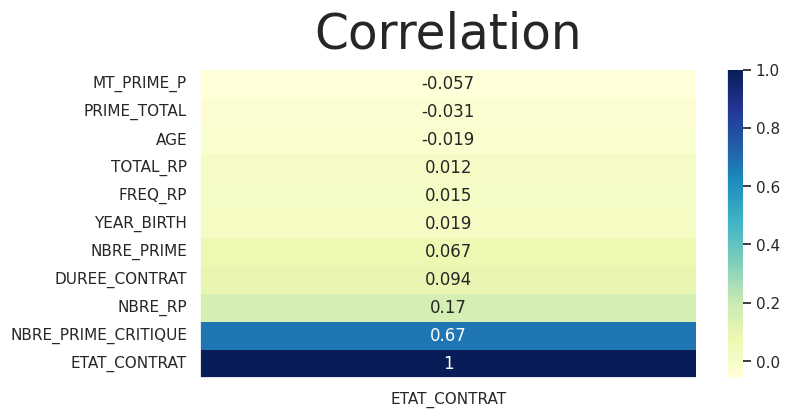

In [246]:
plt.figure(figsize=(8,4))
heatmap = sns.heatmap(data.corr()[['ETAT_CONTRAT']].sort_values(by='ETAT_CONTRAT', ascending=True), annot=True, cmap='YlGnBu')
heatmap.set_title('Correlation', fontdict={'fontsize':35}, pad=16);
sns.despine()
plt.show()

In [247]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4106 entries, 0 to 4125
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CODE_CONTRAT         4106 non-null   object        
 1   NAT_INDIV            4106 non-null   object        
 2   PAYS                 4106 non-null   object        
 3   SIT_PROF             4106 non-null   object        
 4   DATE_EFFET           4106 non-null   datetime64[ns]
 5   DATE_ECHEANCE        4106 non-null   datetime64[ns]
 6   DUREE_CONTRAT        4106 non-null   int64         
 7   FREQ                 4106 non-null   object        
 8   MT_PRIME_P           4106 non-null   int64         
 9   TYPE_PRODUIT         4106 non-null   object        
 10  DATE_RT_1            4106 non-null   datetime64[ns]
 11  PRIME_TOTAL          4106 non-null   int64         
 12  NBRE_PRIME           4106 non-null   int64         
 13  TOTAL_RP             4106 non-nul

In [248]:
data.to_csv('data_FOR_model.csv', index=False)

In [73]:
data.to_csv('data_ready_to_model.csv', index=False)

## PRÉ TRAITEMENT

## CONCEPTION DU MODÈLE

#### [XGBOOST](https://colab.research.google.com/drive/1MJQkYr4fe5P6pAvYDATzDzyZ0TimGC8a?authuser=2) 


#### [RANDOM FOREST](https://colab.research.google.com/drive/10dbIFNrxPjnk8XquntpBIv-DKbm_8xTa?authuser=2)

## RESULTATS & DISCUSSION 